# PETER MUTWIRI


## Project Title - The Indian Start-Up Case

### Context

The data for this project spans from 2018-2019. Our goal will be to satisfy the processes for handling the data and also provide a detailed analysis of the process using the CRISP-DM data analysis framework.

This Notebook will include conclusions on the following :

* Asking the relevant questions and stating some hypothesis.
* Cleaning the data.

### Questions?

* Do companies in certain sectors tend to receive more funding than others?

* Is there a correlation between the stage of development of a company and the amount of funding it receives?

* Are companies with more founders more likely to receive larger amounts of funding?

* Are there any patterns in the location of a company's headquarters and the amount of funding it receives?

* Does the number of investors in a company tend to impact the amount of funding it receives?

* Founders: How many founders are associated with each company? What is the average number of founders?

* What are the top 10 companies with the highest funding?


### Hypothesis! 

* Startups in the e-commerce and fintech sectors receive more funding compared to other sectors in India.

* There is a positive correlation between the stage of development of a company and the amount of funding it receives in India.

* Companies with a larger number of founders are more likely to receive higher amounts of funding in India.

* Startups headquartered in major metropolitan areas such as Mumbai, Bangalore, and Delhi are more likely to receive larger amounts of funding in India.

* The number of investors in a company is positively correlated with the amount of funding it receives in India.

* Is there a relationship between the sector of a company and the amount of funding it receives?

* Is there a difference in the average funding received by companies headquartered in different regions?

## Importing libraries & accessing the size and shape of the data

In [217]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [218]:
ind_2018 = pd.read_csv('../code/datasets/startup_funding2018.csv')
ind_2019 = pd.read_csv('../code/datasets/startup_funding2019.csv')
ind_2020 = pd.read_csv('../code/datasets/startup_funding2020.csv')
ind_2021 = pd.read_csv('../code/datasets/startup_funding2021.csv')

In [219]:
ind_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [220]:
ind_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [221]:
ind_2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

## Filtering the data ,replacing and rename values & a date series(random)

In [222]:
ind_2018['Year']=2018
ind_2018['Founded']='NaN'
ind_2018= ind_2018.rename(columns={'Company Name': 'Company/Brand'})
ind_2018= ind_2018.rename(columns={'Industry': 'Sector'})
ind_2018= ind_2018.rename(columns={'Location': 'HeadQuarter'})
ind_2018= ind_2018.rename(columns={'Amount': 'Amount($)'})
ind_2018= ind_2018.rename(columns={'Round/Series': 'Stage'})
ind_2018.drop('About Company',axis=1,inplace=True)

In [223]:
# replace empty values with NaN
ind_2018['Sector'].replace('—', pd.np.nan, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\2826083760.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2018['Sector'].replace('—', pd.np.nan, inplace=True)


In [224]:
ind_2018.loc[58, 'Sector'] = 'Entertainment'
ind_2018.loc[105, 'Sector'] = 'Finance'
ind_2018.loc[121, 'Sector'] = 'Automotive'
ind_2018.loc[146, 'Sector'] = 'Automotive'
ind_2018.loc[153, 'Sector'] = 'Food'
ind_2018.loc[174, 'Sector'] = 'Technology'
ind_2018.loc[181, 'Sector'] = 'Finance'
ind_2018.loc[210, 'Sector'] = 'Automotive'
ind_2018.loc[230, 'Sector'] = 'Real Estate'
ind_2018.loc[235, 'Sector'] = 'Technology'
ind_2018.loc[238, 'Sector'] = 'Technology'
ind_2018.loc[242, 'Sector'] = 'Real Estate'
ind_2018.loc[243, 'Sector'] = 'Technology'
ind_2018.loc[247, 'Sector'] = 'Technology'
ind_2018.loc[251, 'Sector'] = 'Wellness'
ind_2018.loc[257, 'Sector'] = 'Marketing'
ind_2018.loc[258, 'Sector'] = 'Marketing'
ind_2018.loc[259, 'Sector'] = 'E-Commerce'
ind_2018.loc[257, 'Sector'] = 'Marketing'
ind_2018.loc[294, 'Sector'] = 'Transportation'
ind_2018.loc[325, 'Sector'] = 'Technology'
ind_2018.loc[326, 'Sector'] = 'Finance'
ind_2018.loc[346, 'Sector'] = 'Finance'
ind_2018.loc[398, 'Sector'] = 'Finance'
ind_2018.loc[457, 'Sector'] = 'Agriculture'
ind_2018.loc[472, 'Sector'] = 'Technology'
ind_2018.loc[473, 'Sector'] = 'Technology'
ind_2018.loc[476, 'Sector'] = 'Technology'
ind_2018.loc[478, 'Sector'] = 'Wellness/Beauty'
ind_2018.loc[480, 'Sector'] = 'Hospitality'
ind_2018.loc[510, 'Sector'] = 'Technology'

In [225]:
ind_2018.head(511)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",2018,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",2018,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",2018,NaN
...,...,...,...,...,...,...,...
506,Verzeo,E-Learning,Series A,5000000,"Bangalore, Karnataka, India",2018,NaN
507,Haazri,"Food and Beverage, Snack Food, Tea",Seed,"₹12,500,000","Mumbai, Maharashtra, India",2018,NaN
508,Connect India,"Delivery Service, E-Commerce, Logistics",Angel,—,"New Delhi, Delhi, India",2018,NaN
509,Flyrobe,"Fashion, Lifestyle, Rental",Series B,"₹264,000,000","Mumbai, Maharashtra, India",2018,NaN


In [226]:
ind_2018.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
Year             0
Founded          0
dtype: int64

## Filling the anomalies in this column by containing the valid values and replacing the missing values

In [227]:
# # create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')

# # create a new column 'Date' with random dates within the year 2018
ind_2018['Date'] = np.random.choice(date_range, size=len(ind_2018))

ind_2018 = ind_2018.sort_values('Date')

ind_2018['Date'] = pd.to_datetime(ind_2018['Date'], format='%Y-%m-%d')


In [228]:
ind_2018.set_index('Date',inplace=True)

## Changing the shape of the amount col & currency(rates considered),filling the missing values with mean of the column.

In [229]:
def convert_to_dollars(value):
    if pd.isnull(value):
        return np.nan
    elif isinstance(value, float):
        return str(value)
    elif '$' in value:
        return value
    elif '₹' in value:
        return '$' + str(round(float(value.split('₹')[1].replace(',', '')) / 68.44, 2))
    else:
        return '$' + str(float(value) / 68.44)


# convert values in 'Amount($)' column to strings
ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(str)

ind_2018['Amount($)'] = ind_2018['Amount($)'].str.replace('[^\d\.]', '')

ind_2018['Amount($)'].replace('', np.nan, inplace=True)

ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(float)

ind_2018['Amount($)'] = ind_2018['Amount($)'].apply(convert_to_dollars)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\4169188906.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2018['Amount($)'] = ind_2018['Amount($)'].str.replace('[^\d\.]', '')


In [230]:
# # convert the 'Amount' column to a numeric data type
ind_2018['Amount($)'] = pd.to_numeric(ind_2018['Amount($)'])
ind_2018['Amount($)'] = pd.to_numeric(ind_2018['Amount($)'])

In [231]:
ind_2018.describe()

,Amount($),Year
count,3.780000e+02,526.0
mean,2.391683e+08,2018.0
std,1.374900e+09,0.0
min,7.500000e+03,2018.0
25%,1.000000e+06,2018.0
50%,5.800000e+06,2018.0
75%,5.000000e+07,2018.0
max,2.000000e+10,2018.0


In [232]:
ind_2018.duplicated()

Date
2018-01-01    False
2018-01-01    False
2018-01-01    False
2018-01-02    False
2018-01-04    False
              ...  
2018-12-24    False
2018-12-25    False
2018-12-27    False
2018-12-29    False
2018-12-30    False
Length: 526, dtype: bool

In [233]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)        148
HeadQuarter        0
Year               0
Founded            0
dtype: int64

In [234]:
ind_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-01,Guiddoo World,"Audio, Mobile, Tourism, Travel",Seed,800000.0,"Mumbai, Maharashtra, India",2018,NaN
2018-01-01,Verloop,"Customer Service, Information Technology, Inte...",Series A,3000000.0,"Bangalore, Karnataka, India",2018,NaN
2018-01-01,Chizel,"3D Printing, Manufacturing, Product Design",Seed,NaN,"Pune, Maharashtra, India",2018,NaN
2018-01-02,MCaffeine,Consumer Goods,Seed,32000000.0,"Mumbai, Maharashtra, India",2018,NaN
2018-01-04,Tricog Health Services Pvt Ltd,"Health Care, Health Diagnostics, Predictive An...",Series A,4000000.0,"Bangalore, Karnataka, India",2018,NaN


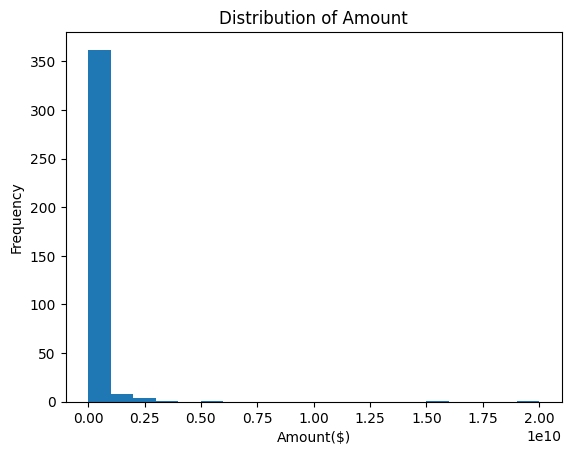

In [235]:
# Create a histogram of the 'Amount' column
plt.hist(ind_2018['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

In [236]:
ind_2018['Amount($)'] = ind_2018['Amount($)'].fillna(ind_2018['Amount($)'].median())

In [237]:
ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(int)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [238]:
ind_2018.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
Year             0
Founded          0
dtype: int64

In [239]:
ind_2018.head(100)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-01,Guiddoo World,"Audio, Mobile, Tourism, Travel",Seed,800000,"Mumbai, Maharashtra, India",2018,NaN
2018-01-01,Verloop,"Customer Service, Information Technology, Inte...",Series A,3000000,"Bangalore, Karnataka, India",2018,NaN
2018-01-01,Chizel,"3D Printing, Manufacturing, Product Design",Seed,5800000,"Pune, Maharashtra, India",2018,NaN
2018-01-02,MCaffeine,Consumer Goods,Seed,32000000,"Mumbai, Maharashtra, India",2018,NaN
2018-01-04,Tricog Health Services Pvt Ltd,"Health Care, Health Diagnostics, Predictive An...",Series A,4000000,"Bangalore, Karnataka, India",2018,NaN
...,...,...,...,...,...,...,...
2018-03-05,Happy Cow Dairy,"Agriculture, Farming",Seed,40000000,"Mumbai, Maharashtra, India",2018,NaN
2018-03-05,Vogo Rentals,"Last Mile Transportation, Railroad, Transporta...",Debt Financing,80000000,"Kormangala, Karnataka, India",2018,NaN
2018-03-05,Racetrack,"Artificial Intelligence, Cloud Computing, Video",Seed,342000000,"Bangalore, Karnataka, India",2018,NaN


## Replacing missing values in stage & Founded col / filtering headquater col / filtering the sector col by closing them in related col by using str.contain

In [240]:
valid_stages = ['Venture - Series Unknown','Seed', 'Angel', 'Series A', 'Series B', 'Pre-Seed', 'Grant', 'Series H', 
                'Series A', 'Series C', 'Series E', 'Corporate Round','Series D','Debt financing','Post-IPO Equity']

ind_2018.loc[~ind_2018['Stage'].isin(valid_stages), 'Stage'] = np.nan

In [241]:
mode_value = ind_2018['Stage'].mode()[0]
print(mode_value)

Seed


In [242]:
ind_2018['Stage'] = ind_2018['Stage'].fillna(ind_2018['Stage'].mode()[0])
ind_2018['Founded'] = ind_2018['Founded'].replace('NaN', np.nan)

In [243]:
ind_2018.head(100)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-01,Guiddoo World,"Audio, Mobile, Tourism, Travel",Seed,800000,"Mumbai, Maharashtra, India",2018,NaN
2018-01-01,Verloop,"Customer Service, Information Technology, Inte...",Series A,3000000,"Bangalore, Karnataka, India",2018,NaN
2018-01-01,Chizel,"3D Printing, Manufacturing, Product Design",Seed,5800000,"Pune, Maharashtra, India",2018,NaN
2018-01-02,MCaffeine,Consumer Goods,Seed,32000000,"Mumbai, Maharashtra, India",2018,NaN
2018-01-04,Tricog Health Services Pvt Ltd,"Health Care, Health Diagnostics, Predictive An...",Series A,4000000,"Bangalore, Karnataka, India",2018,NaN
...,...,...,...,...,...,...,...
2018-03-05,Happy Cow Dairy,"Agriculture, Farming",Seed,40000000,"Mumbai, Maharashtra, India",2018,NaN
2018-03-05,Vogo Rentals,"Last Mile Transportation, Railroad, Transporta...",Seed,80000000,"Kormangala, Karnataka, India",2018,NaN
2018-03-05,Racetrack,"Artificial Intelligence, Cloud Computing, Video",Seed,342000000,"Bangalore, Karnataka, India",2018,NaN


In [244]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)          0
HeadQuarter        0
Year               0
Founded          526
dtype: int64

In [245]:
# Split the Headquarters column by comma, and keep only the first value
ind_2018["City"] = ind_2018["HeadQuarter"].apply(lambda x: x.split(",")[0])

In [246]:
ind_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded,City
Date,,,,,,,,
2018-01-01,Guiddoo World,"Audio, Mobile, Tourism, Travel",Seed,800000,"Mumbai, Maharashtra, India",2018,NaN,Mumbai
2018-01-01,Verloop,"Customer Service, Information Technology, Inte...",Series A,3000000,"Bangalore, Karnataka, India",2018,NaN,Bangalore
2018-01-01,Chizel,"3D Printing, Manufacturing, Product Design",Seed,5800000,"Pune, Maharashtra, India",2018,NaN,Pune
2018-01-02,MCaffeine,Consumer Goods,Seed,32000000,"Mumbai, Maharashtra, India",2018,NaN,Mumbai
2018-01-04,Tricog Health Services Pvt Ltd,"Health Care, Health Diagnostics, Predictive An...",Series A,4000000,"Bangalore, Karnataka, India",2018,NaN,Bangalore


In [247]:
ind_2018.drop('HeadQuarter',axis=1,inplace=True)

In [248]:
ind_2018 = ind_2018.rename(columns={'City': 'HeadQuarter'})

In [249]:
# replace "Bengaluru" with "Bangalore" in the "headquarter" column
ind_2018['HeadQuarter'] = ind_2018['HeadQuarter'].str.replace('Bengaluru', 'Bangalore')
ind_2018['HeadQuarter'] = ind_2018['HeadQuarter'].str.replace('Bangalore City', 'Bangalore')
ind_2018['HeadQuarter'] = ind_2018['HeadQuarter'].str.replace('New Delhi', 'Delhi')
ind_2018['HeadQuarter'] = ind_2018['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [250]:
unique_values = ind_2018['HeadQuarter'].unique()
print(unique_values)

['Mumbai' 'Bangalore' 'Pune' 'Delhi' 'Noida' 'Jaipur' 'Kolkata' 'Gurugram'
 'Chennai' 'Mohali' 'Bhopal' 'Andheri' 'Thane' 'Hyderabad' 'Ahmedabad'
 'Ghaziabad' 'Haryana' 'Alwar' 'Faridabad' 'Kormangala' 'Uttar Pradesh'
 'Margão' 'Anand' 'India' 'Guindy' 'Coimbatore' 'Indore' 'Ernakulam'
 'Chandigarh' 'Kannur' 'Mylapore' 'Kota' 'Worli' 'Alleppey' 'Kochi'
 'Trivandrum' 'Belgaum' 'Lucknow' 'Hubli' 'Kalpakkam' 'Kanpur' 'Powai'
 'Jodhpur' 'Guntur' 'Cochin' 'Kalkaji' 'Azadpur']


In [251]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)          0
Year               0
Founded          526
HeadQuarter        0
dtype: int64

In [252]:
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']



ind_2018['Sector_clean'] = 'Other'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [253]:
ind_2018.drop('Sector',axis=1,inplace=True)

In [254]:
ind_2018= ind_2018.rename(columns={'Sector_clean': 'Sector'})

In [255]:
ind_2018.head()

,Company/Brand,Stage,Amount($),Year,Founded,HeadQuarter,Sector
Date,,,,,,,
2018-01-01,Guiddoo World,Seed,800000,2018,NaN,Mumbai,Logistics
2018-01-01,Verloop,Series A,3000000,2018,NaN,Bangalore,Technology
2018-01-01,Chizel,Seed,5800000,2018,NaN,Pune,Manufacture
2018-01-02,MCaffeine,Seed,32000000,2018,NaN,Mumbai,Consumer Services
2018-01-04,Tricog Health Services Pvt Ltd,Series A,4000000,2018,NaN,Bangalore,Automotive


## Ploting visuals to check the shape of the dataframe

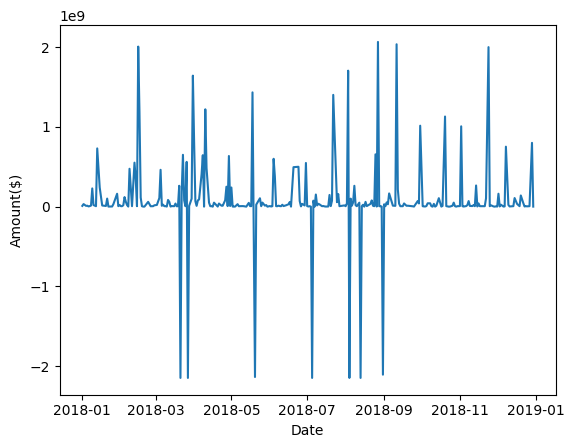

In [256]:
import seaborn as sns

# Plot a line chart of funding amounts over time
funding_over_time = ind_2018.groupby('Date')['Amount($)'].sum().reset_index()
sns.lineplot(data=funding_over_time, x='Date', y='Amount($)')
plt.show()


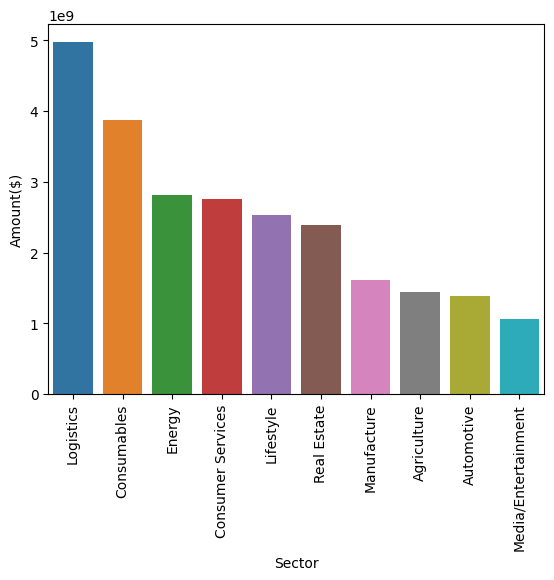

In [257]:
if ind_2018.empty:
    print("No data found for the year 2018")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2018.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


## 2019

## Accessing the shape of the data, Filling the missing the val with statistical means,Dropping columns,Creating a date series

In [258]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [259]:
ind_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [260]:
ind_2019.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


In [261]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [262]:
ind_2019.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 89, dtype: bool

In [263]:
ind_2019['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2019['Year']=2019

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\4162604990.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2019['Sector'].replace('—', pd.np.nan, inplace=True)


In [264]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
Year              0
dtype: int64

In [265]:
ind_2019.loc[41, 'Sector'] = 'Media'
ind_2019.loc[49, 'Sector'] = 'Human Resources'
ind_2019.loc[52, 'Sector'] = 'Technology'
ind_2019.loc[56, 'Sector'] = 'Technology'
ind_2019.loc[57, 'Sector'] = 'E-Commerce'

In [266]:
ind_2019.drop('What it does',axis=1,inplace=True)

In [267]:
# # create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2019-01-01', end='2019-12-31', freq='D')

# # create a new column 'Date' with random dates within the year 2018
ind_2019['Date'] = np.random.choice(date_range, size=len(ind_2019))

ind_2019 = ind_2019.sort_values('Date')

ind_2019['Date'] = pd.to_datetime(ind_2019['Date'], format='%Y-%m-%d')

In [268]:
ind_2019.set_index('Date',inplace=True)

In [269]:
mode_value = ind_2019['Founders'].mode()[0]
print(mode_value)

mode_value = ind_2019['HeadQuarter'].mode()[0]
print(mode_value)

mode_value = ind_2019['Stage'].mode()[0]
print(mode_value)

Vivek Gupta, Abhay Hanjura
Bangalore
Series A


In [270]:
ind_2019['HeadQuarter'] = ind_2019['HeadQuarter'].fillna(ind_2019['HeadQuarter'].mode()[0])
ind_2019['Stage'] = ind_2019['Stage'].fillna(ind_2019['Stage'].mode()[0])
ind_2019['Founders'] = ind_2019['Founders'].fillna(ind_2019['Founders'].mode()[0])

In [271]:
ind_2019['HeadQuarter'] = ind_2019['HeadQuarter'].str.replace('New Delhi', 'Delhi')

In [272]:
unique_values = ind_2019['HeadQuarter'].unique()
print(unique_values)

['Delhi' 'Chennai' 'Bangalore' 'Noida' 'Gurugram' 'Mumbai' 'Rajasthan'
 'Pune' 'Uttar pradesh' 'Jaipur' 'Chandigarh' 'Hyderabad' 'Surat'
 'Ahmedabad' 'Haryana' 'Telangana']


## Using Statiscal means to fill the missing values in the founded column

In [273]:
ind_2019['Founded'] = pd.to_numeric(ind_2019['Founded'], errors='coerce')

In [274]:
ind_2019['Founded'] = ind_2019['Founded'].fillna(0)

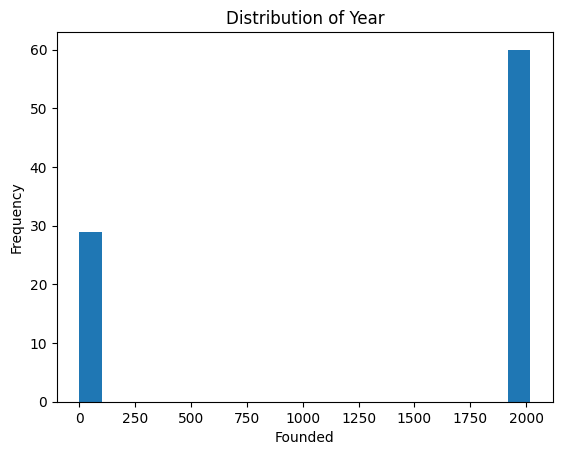

In [275]:
plt.hist(ind_2019['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [276]:
ind_2019['Founded'].replace(0, np.nan, inplace=True)

In [277]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter       0
Sector            0
Founders          0
Investor          0
Amount($)         0
Stage             0
Year              0
dtype: int64

In [278]:
ind_2019['Founded'].fillna(ind_2019['Founded'].median(), inplace=True)

In [279]:
ind_2019['Founded'] = ind_2019['Founded'].astype(int)

## Restructuring the shape of the column & using statistical means to fill them, Restructuring the name convention of the sector column by containing it in a list of substrings and assigning it to name. 

In [280]:
ind_2019['Amount($)'].replace('', pd.np.nan, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\1514532099.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2019['Amount($)'].replace('', pd.np.nan, inplace=True)


In [281]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].str.replace('[^\d\.]', '')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\661071711.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2019['Amount($)'] = ind_2019['Amount($)'].str.replace('[^\d\.]', '')


In [282]:
ind_2019['Amount($)'] = pd.to_numeric(ind_2019['Amount($)'])
ind_2019['Amount($)'] = pd.to_numeric(ind_2019['Amount($)'])

In [283]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2019-01-04,Seekify,2019,Delhi,SaaS,"Arihant Jain, Ajeet Kushwaha",Sequoia Capita,1500000.0,Seed funding,2019
2019-01-06,WishADish,2015,Delhi,Food & tech,"Sawan Kumar, Bhavya Bhambhani",Undisclosed,6000000.0,Series A,2019
2019-01-11,PiBeam,2015,Chennai,Automotive tech,Visakh Sasikumar,GAIL (India) Ltd,50000000.0,Series A,2019
2019-01-23,Fireflies .ai,2015,Bangalore,AI,Sam Udotong,Canaan Partners,5000000.0,Series A,2019
2019-02-09,Kratikal,2013,Noida,Technology,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000.0,Pre series A,2019


In [284]:
ind_2019.isna().sum()

Company/Brand     0
Founded           0
HeadQuarter       0
Sector            0
Founders          0
Investor          0
Amount($)        12
Stage             0
Year              0
dtype: int64

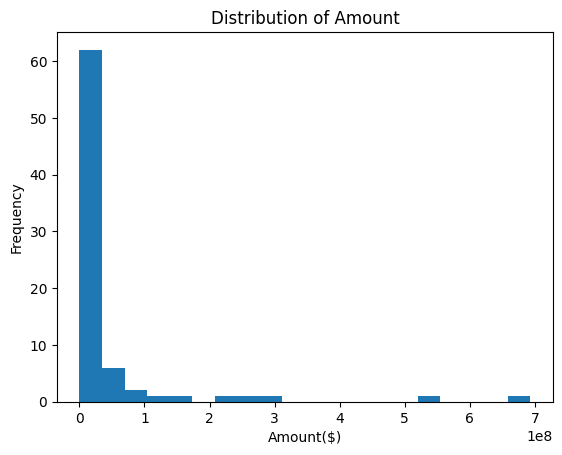

In [285]:
# Create a histogram of the 'Amount' column
plt.hist(ind_2019['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

In [286]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].fillna(ind_2019['Amount($)'].median())

In [287]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].astype(int)

In [288]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2019-01-04,Seekify,2019,Delhi,SaaS,"Arihant Jain, Ajeet Kushwaha",Sequoia Capita,1500000,Seed funding,2019
2019-01-06,WishADish,2015,Delhi,Food & tech,"Sawan Kumar, Bhavya Bhambhani",Undisclosed,6000000,Series A,2019
2019-01-11,PiBeam,2015,Chennai,Automotive tech,Visakh Sasikumar,GAIL (India) Ltd,50000000,Series A,2019
2019-01-23,Fireflies .ai,2015,Bangalore,AI,Sam Udotong,Canaan Partners,5000000,Series A,2019
2019-02-09,Kratikal,2013,Noida,Technology,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000,Pre series A,2019


In [289]:
ind_2019.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

In [290]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2019['Sector_clean'] = 'Other'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [291]:
ind_2019.drop('Sector',axis=1,inplace=True)

In [292]:
ind_2019= ind_2019.rename(columns={'Sector_clean': 'Sector'})

In [293]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Sector
Date,,,,,,,,,
2019-01-04,Seekify,2019,Delhi,"Arihant Jain, Ajeet Kushwaha",Sequoia Capita,1500000,Seed funding,2019,Technology
2019-01-06,WishADish,2015,Delhi,"Sawan Kumar, Bhavya Bhambhani",Undisclosed,6000000,Series A,2019,Consumables
2019-01-11,PiBeam,2015,Chennai,Visakh Sasikumar,GAIL (India) Ltd,50000000,Series A,2019,Automotive
2019-01-23,Fireflies .ai,2015,Bangalore,Sam Udotong,Canaan Partners,5000000,Series A,2019,Technology
2019-02-09,Kratikal,2013,Noida,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000,Pre series A,2019,Technology


## Ploting Visuals to check the shape of the dataframe

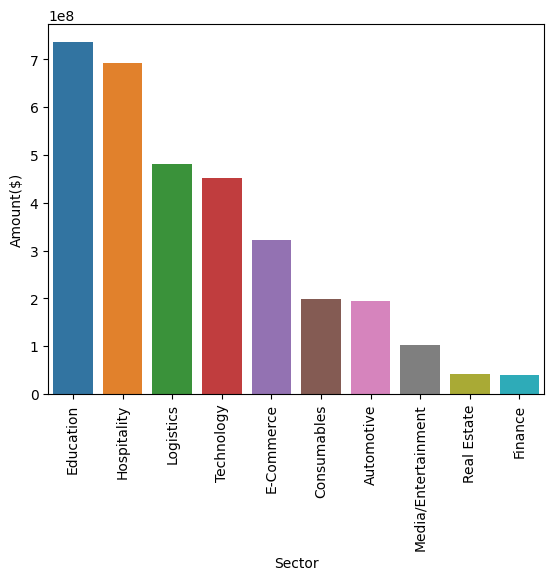

In [294]:
if ind_2019.empty:
    print("No data found for the year 2019")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2019.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


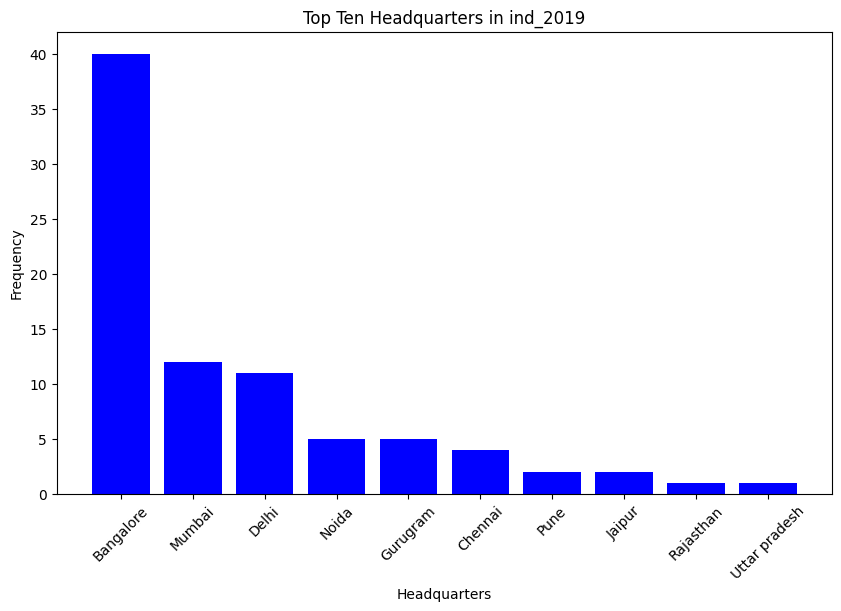

In [295]:
# Get the top ten headquarters
top_ten_hq = ind_2019['HeadQuarter'].value_counts().nlargest(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_ten_hq.index, top_ten_hq.values, color='blue')
plt.title('Top Ten Headquarters in ind_2019')
plt.xlabel('Headquarters')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## 2020

## Checking the shape of the data,Replace missing values and dropping,adding a date series

In [296]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [297]:
ind_2020.describe()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
count,1055,843,961,1042,1055,1043,1017,1052,591,2
unique,905,27,77,302,990,927,848,309,42,2
top,Nykaa,2015,Bangalore,Fintech,Provides online learning classes,Falguni Nayar,Venture Catalysts,Undisclosed,Series A,Pre-Seed
freq,6,136,317,80,4,6,20,243,96,1


In [298]:
ind_2020['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2020['Year']=2020

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\1812708846.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2020['Sector'].replace('—', pd.np.nan, inplace=True)


In [299]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
Year                0
dtype: int64

In [300]:
ind_2020.loc[518, 'Sector'] = 'E-Commerce'
ind_2020.loc[569, 'Sector'] = 'E-Commerce'
ind_2020.loc[687, 'Sector'] = 'Social Work'
ind_2020.loc[699, 'Sector'] = 'Beauty&Wellness'
ind_2020.loc[707, 'Sector'] = 'E-Commerce'
ind_2020.loc[732, 'Sector'] = 'Technology'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'
ind_2020.loc[763, 'Sector'] = 'E-Commerce'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'
ind_2020.loc[809, 'Sector'] = 'Technology'
ind_2020.loc[918, 'Sector'] = 'Fintech'
ind_2020.loc[926, 'Sector'] = 'Real Estate'
ind_2020.loc[1012, 'Sector'] = 'Technology'
ind_2020.loc[1031, 'Sector'] = 'Technology'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'

In [301]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector              0
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
Year                0
dtype: int64

In [302]:
ind_2020.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1050    False
1051    False
1052    False
1053    False
1054    False
Length: 1055, dtype: bool

In [303]:
ind_2020.drop_duplicates(inplace=True)

In [304]:
# create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')

# create a new column 'Date' with random dates within the year 2018
ind_2020['Date'] = np.random.choice(date_range, size=len(ind_2020))

ind_2020 = ind_2020.sort_values('Date')

ind_2020['Date'] = pd.to_datetime(ind_2020['Date'], format='%Y-%m-%d')

In [305]:
ind_2020.set_index('Date',inplace=True)

## Filling & replacing val in the HQ col using dictionary then filling in missing values for dif col, using substrings to alter some rows

In [306]:
cities_to_replace = ["Tirunelveli, Tamilnadu", "Frisco, Texas, United States", "Dhingsara, Haryana", "New York, United States",
"Jaipur, Rajastan", "Jaipur, Rajastan", "San Francisco, California, United States", "San Francisco, United States", 
 "San Ramon, California", "Paris, Ile-de-France, France", "Plano, Texas, United States",
"San Francisco Bay Area, Silicon Valley,West Coast", "London, England, United Kingdom", "Sydney, New South Wales, Australia", 
"Milano, Lombardia, Italy", "New York, United States", "Palmwoods, Queensland, Australia", "London, England, United Kingdom", 
"San Francisco Bay Area, West Coast, Western US", "Trivandrum, Kerala, India", "Samastipur, Bihar",
"Irvine, California, United States", "Tumkur, Karnataka", "San Francisco Bay Area, Silicon Valley, West Coast", 
"San Francisco, California, United States", "Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom", "Shanghai, China", 
"Jiaxing, Zhejiang, China", "Tangerang, Jawa Barat, Indonesia"]

new_cities = ['Tamilnadu', 'Texas', 'Haryana', 'New York', 'Rajastan', 'Rajastan', 'San Francisco', 'San Francisco', 
'San Ramon', 'Paris', 'Texas', 'San Francisco', 'London', 'Sydney', 'Milano', 'New York', 'Queensland', 'London', 
'San Francisco', 'Kerala', 'Biphar', 'California', 'Karnataka', 'San Francisco', 'San Francisco', 'Newcastle', 'Shanghai', 
'Jiaxing', 'Jawa Barat']

for city, new_city in zip(cities_to_replace, new_cities):
    ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].apply(lambda x: new_city if city in str(x) else x)


In [307]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector              0
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             462
Unnamed: 9       1050
Year                0
dtype: int64

In [308]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9,Year
Date,,,,,,,,,,,
2020-01-01,Genius Teacher,2016,Mumbai,Edtech,Genius Teacher creates engaging educational co...,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus","$2,000,000",NaN,NaN,2020
2020-01-01,ShipsKart,2018,New Delhi,E-commerce,ShipsKart platform that streamlines the way ma...,"Dhruv Sawhney, Vivek Sahi, Sunny Bagla",Betatron,"$200,000",Pre-series A,NaN,2020
2020-01-01,EkAnek,2018,New Delhi,Tech Startup,EkAnek Networks is a new startup that is focus...,"Chandranshu Sinha, Kartik Sheth","Lightspeed India Partners, Sequoia Capital India","$5,040,000",Edge,NaN,2020
2020-01-01,GabbarDeals,NaN,Pune,Ecommerce,Online-to-Offline platforms for mobile phones ...,"Niraj Raka, Poonam Gugale, Piyush Raka",Venture Catalysts,Undisclosed,NaN,NaN,2020
2020-01-02,Swipez,2014,Pune,FinTech,Swipez is a payment collection platform.,Vivek Iyer,"9Unicorns, Anicut",Undisclosed,NaN,NaN,2020


In [309]:
mode_value = ind_2020['Founders'].mode()[0]
print(mode_value)

mode_value = ind_2020['Stage'].mode()[0]
print(mode_value)

mode_value = ind_2020['Investor'].mode()[0]
print(mode_value)

mode_value = ind_2020['HeadQuarter'].mode()[0]
print(mode_value)

Byju Raveendran
Series A
Venture Catalysts
Bangalore


In [310]:
ind_2020['Founders'] = ind_2020['Founders'].fillna(ind_2020['Founders'].mode()[0])
ind_2020['Stage'] = ind_2020['Stage'].fillna(ind_2020['Stage'].mode()[0])
ind_2020['Investor'] = ind_2020['Investor'].fillna(ind_2020['Investor'].mode()[0])
ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].fillna(ind_2020['HeadQuarter'].mode()[0])

In [311]:
ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].str.replace('New Delhi', 'Delhi')
ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].str.replace('Banglore', 'Bangalore')
ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [312]:
unique_values = ind_2020['HeadQuarter'].unique()
print(unique_values)

['Mumbai' 'Delhi' 'Pune' 'Ahmedabad' 'Goa' 'Bangalore' 'Gurugram'
 'Jodhpur' 'Chennai' 'Jaipur' 'Kolkata' 'Thane' 'Hyderabad' 'Chandigarh'
 'France' 'Noida' 'Shanghai' 'Biphar' 'Texas' 'Indore' 'Patna'
 'San Francisco' 'Haryana' 'Riyadh' 'California' 'Seattle' 'Andheri'
 'Rajastan' 'Kanpur' 'Gujarat' 'Belgaum' 'Newcastle' 'Singapore'
 'Dehradun' 'Tamilnadu' 'Bihar' 'Paris' 'Kerala' 'San Ramon' 'Bangkok'
 'Karnataka' 'Odisha' 'New York' 'Queensland' 'Ludhiana' 'Sydney'
 'Jiaxing' 'Kochi' 'Berlin' 'Hyderebad' 'Seoul' 'London' 'Coimbatore'
 'Bangaldesh' 'Uttar Pradesh' 'Bengaluru' 'San Franciscao' 'Tamil Nadu'
 'Bhopal' 'Cochin' 'Jawa Barat' 'Warangal' 'Milano']


In [313]:
seedr = ['seed round','Seed round','Seed Round',]
preser= ['Pre Series A','Pre series A','Pre-series A','Pre-Series A']

ind_2020.loc[ind_2020['Stage'].str.contains('|'.join(seedr)), 'Stage'] = 'Seed Round'
ind_2020.loc[ind_2020['Stage'].str.contains('|'.join(preser)), 'Stage'] = 'Pre-series A'

In [314]:
ind_2020['Founded'] = pd.to_numeric(ind_2020['Founded'], errors='coerce')

ind_2020['Founded'] = ind_2020['Founded'].fillna(0)

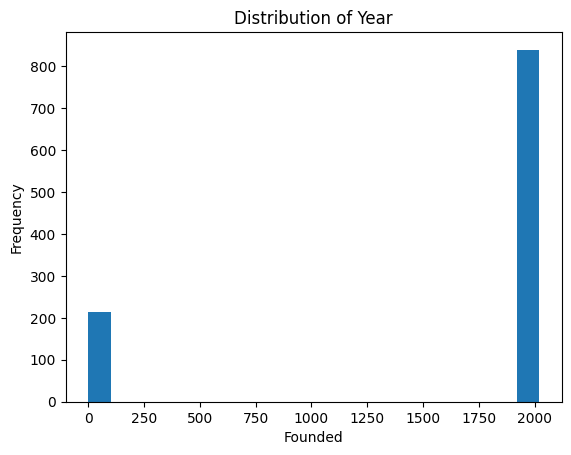

In [315]:
plt.hist(ind_2020['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

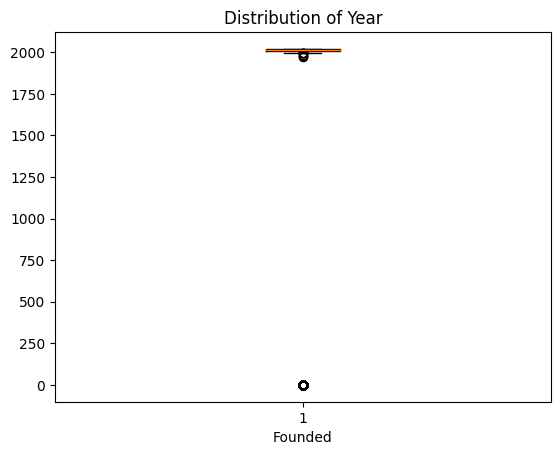

In [316]:
plt.boxplot(ind_2020['Founded'].dropna())
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.show()

In [317]:
ind_2020['Founded'].replace(0, np.nan, inplace=True)

In [318]:
ind_2020['Founded'].fillna(ind_2020['Founded'].median(), inplace=True)

ind_2020['Founded'] = ind_2020['Founded'].astype(int)

In [319]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9,Year
Date,,,,,,,,,,,
2020-01-01,Genius Teacher,2016,Mumbai,Edtech,Genius Teacher creates engaging educational co...,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus","$2,000,000",Series A,NaN,2020
2020-01-01,ShipsKart,2018,Delhi,E-commerce,ShipsKart platform that streamlines the way ma...,"Dhruv Sawhney, Vivek Sahi, Sunny Bagla",Betatron,"$200,000",Pre-series A,NaN,2020
2020-01-01,EkAnek,2018,Delhi,Tech Startup,EkAnek Networks is a new startup that is focus...,"Chandranshu Sinha, Kartik Sheth","Lightspeed India Partners, Sequoia Capital India","$5,040,000",Edge,NaN,2020
2020-01-01,GabbarDeals,2016,Pune,Ecommerce,Online-to-Offline platforms for mobile phones ...,"Niraj Raka, Poonam Gugale, Piyush Raka",Venture Catalysts,Undisclosed,Series A,NaN,2020
2020-01-02,Swipez,2014,Pune,FinTech,Swipez is a payment collection platform.,Vivek Iyer,"9Unicorns, Anicut",Undisclosed,Series A,NaN,2020


In [320]:
ind_2020.drop('What it does',axis=1,inplace=True)

In [321]:
ind_2020.drop('Unnamed: 9',axis=1,inplace=True)

In [322]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        3
Stage            0
Year             0
dtype: int64

In [323]:
ind_2020.head(50)

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,Genius Teacher,2016,Mumbai,Edtech,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus","$2,000,000",Series A,2020
2020-01-01,ShipsKart,2018,Delhi,E-commerce,"Dhruv Sawhney, Vivek Sahi, Sunny Bagla",Betatron,"$200,000",Pre-series A,2020
2020-01-01,EkAnek,2018,Delhi,Tech Startup,"Chandranshu Sinha, Kartik Sheth","Lightspeed India Partners, Sequoia Capital India","$5,040,000",Edge,2020
2020-01-01,GabbarDeals,2016,Pune,Ecommerce,"Niraj Raka, Poonam Gugale, Piyush Raka",Venture Catalysts,Undisclosed,Series A,2020
2020-01-02,Swipez,2014,Pune,FinTech,Vivek Iyer,"9Unicorns, Anicut",Undisclosed,Series A,2020
2020-01-02,Gamerji,2018,Ahmedabad,Gaming startup,"Soham Thacker, Valay Patel, Varun Gajjar",La Gajjar Group.,Undisclosed,Seed,2020
2020-01-02,NCOME,2020,Delhi,Escrow,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",Series A,2020
2020-01-02,Tea Trunk,2013,Goa,Beverage,"Snigdha Manchanda, Vikas Kumar, Aishwarya Malhi",Angel investors,"$220,000",Series A,2020
2020-01-02,Cityflo,2015,Mumbai,Transportation,"Advaith Vishwanath, Ankit Agrawal, Jerin Venad...","Anupam Mittal, India Quotient","$7,000,000",Series A,2020


## Converting the structure of the amt col,filling missing val with stats data,creating a substring to structure the sector column

In [324]:
ind_2020['Amount($)'].replace('', pd.np.nan, inplace=True)
ind_2020['Amount($)'] = ind_2020['Amount($)'].replace('undisclosed', np.nan)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\4231441892.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2020['Amount($)'].replace('', pd.np.nan, inplace=True)


In [325]:
# if it is not already a string, convert it to string
if ind_2020['Amount($)'].dtype != 'object':
    ind_2020['Amount($)'] = ind_2020['Amount($)'].astype(str)

# # remove non-numeric characters from the 'Amount' column
ind_2020['Amount($)'] = ind_2020['Amount($)'].str.replace('[^\d\.]', '')

ind_2020['Amount($)'] = pd.to_numeric(ind_2020['Amount($)'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\2403162787.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2020['Amount($)'] = ind_2020['Amount($)'].str.replace('[^\d\.]', '')


In [326]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,Genius Teacher,2016,Mumbai,Edtech,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus",2000000.0,Series A,2020
2020-01-01,ShipsKart,2018,Delhi,E-commerce,"Dhruv Sawhney, Vivek Sahi, Sunny Bagla",Betatron,200000.0,Pre-series A,2020
2020-01-01,EkAnek,2018,Delhi,Tech Startup,"Chandranshu Sinha, Kartik Sheth","Lightspeed India Partners, Sequoia Capital India",5040000.0,Edge,2020
2020-01-01,GabbarDeals,2016,Pune,Ecommerce,"Niraj Raka, Poonam Gugale, Piyush Raka",Venture Catalysts,NaN,Series A,2020
2020-01-02,Swipez,2014,Pune,FinTech,Vivek Iyer,"9Unicorns, Anicut",NaN,Series A,2020


In [327]:
ind_2020['Amount($)'] = ind_2020['Amount($)'].fillna(0)

In [328]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

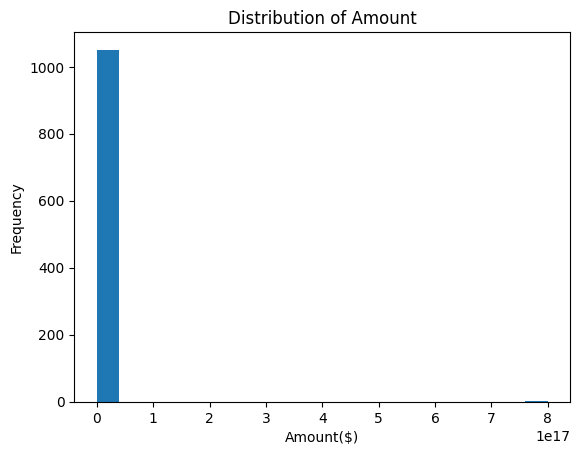

In [329]:
plt.hist(ind_2020['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

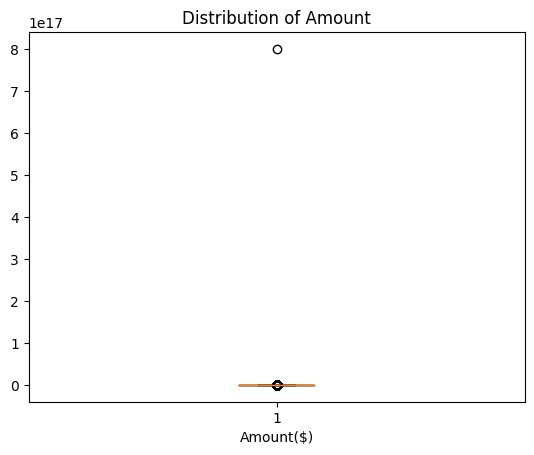

In [330]:
plt.boxplot(ind_2020['Amount($)'])
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.show()

In [331]:
ind_2020['Amount($)'].replace(0, np.nan, inplace=True)

In [332]:
ind_2020.isna().sum()

Company/Brand      0
Founded            0
HeadQuarter        0
Sector             0
Founders           0
Investor           0
Amount($)        247
Stage              0
Year               0
dtype: int64

In [333]:
ind_2020['Amount($)'].fillna(ind_2020['Amount($)'].median(), inplace=True)

ind_2020['Amount($)'] = ind_2020['Amount($)'].astype(int)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [334]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,Genius Teacher,2016,Mumbai,Edtech,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus",2000000,Series A,2020
2020-01-01,ShipsKart,2018,Delhi,E-commerce,"Dhruv Sawhney, Vivek Sahi, Sunny Bagla",Betatron,200000,Pre-series A,2020
2020-01-01,EkAnek,2018,Delhi,Tech Startup,"Chandranshu Sinha, Kartik Sheth","Lightspeed India Partners, Sequoia Capital India",5040000,Edge,2020
2020-01-01,GabbarDeals,2016,Pune,Ecommerce,"Niraj Raka, Poonam Gugale, Piyush Raka",Venture Catalysts,3000000,Series A,2020
2020-01-02,Swipez,2014,Pune,FinTech,Vivek Iyer,"9Unicorns, Anicut",3000000,Series A,2020


In [335]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG','Beverage']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2020['Sector_clean'] = 'Other'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [336]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Sector_clean
Date,,,,,,,,,,
2020-01-01,Genius Teacher,2016,Mumbai,Edtech,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus",2000000,Series A,2020,Education
2020-01-01,ShipsKart,2018,Delhi,E-commerce,"Dhruv Sawhney, Vivek Sahi, Sunny Bagla",Betatron,200000,Pre-series A,2020,E-Commerce
2020-01-01,EkAnek,2018,Delhi,Tech Startup,"Chandranshu Sinha, Kartik Sheth","Lightspeed India Partners, Sequoia Capital India",5040000,Edge,2020,Technology
2020-01-01,GabbarDeals,2016,Pune,Ecommerce,"Niraj Raka, Poonam Gugale, Piyush Raka",Venture Catalysts,3000000,Series A,2020,E-Commerce
2020-01-02,Swipez,2014,Pune,FinTech,Vivek Iyer,"9Unicorns, Anicut",3000000,Series A,2020,FinTech


In [337]:
ind_2020.drop('Sector',axis=1,inplace=True)

In [338]:
ind_2020= ind_2020.rename(columns={'Sector_clean': 'Sector'})

In [339]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Sector           0
dtype: int64

In [340]:
ind_2020.head(50)

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Sector
Date,,,,,,,,,
2020-01-01,Genius Teacher,2016,Mumbai,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus",2000000,Series A,2020,Education
2020-01-01,ShipsKart,2018,Delhi,"Dhruv Sawhney, Vivek Sahi, Sunny Bagla",Betatron,200000,Pre-series A,2020,E-Commerce
2020-01-01,EkAnek,2018,Delhi,"Chandranshu Sinha, Kartik Sheth","Lightspeed India Partners, Sequoia Capital India",5040000,Edge,2020,Technology
2020-01-01,GabbarDeals,2016,Pune,"Niraj Raka, Poonam Gugale, Piyush Raka",Venture Catalysts,3000000,Series A,2020,E-Commerce
2020-01-02,Swipez,2014,Pune,Vivek Iyer,"9Unicorns, Anicut",3000000,Series A,2020,FinTech
2020-01-02,Gamerji,2018,Ahmedabad,"Soham Thacker, Valay Patel, Varun Gajjar",La Gajjar Group.,3000000,Seed,2020,Gaming
2020-01-02,NCOME,2020,Delhi,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,Series A,2020,Finance
2020-01-02,Tea Trunk,2013,Goa,"Snigdha Manchanda, Vikas Kumar, Aishwarya Malhi",Angel investors,220000,Series A,2020,Consumables
2020-01-02,Cityflo,2015,Mumbai,"Advaith Vishwanath, Ankit Agrawal, Jerin Venad...","Anupam Mittal, India Quotient",7000000,Series A,2020,Logistics


## Ploting visuals to check the dataframe shape

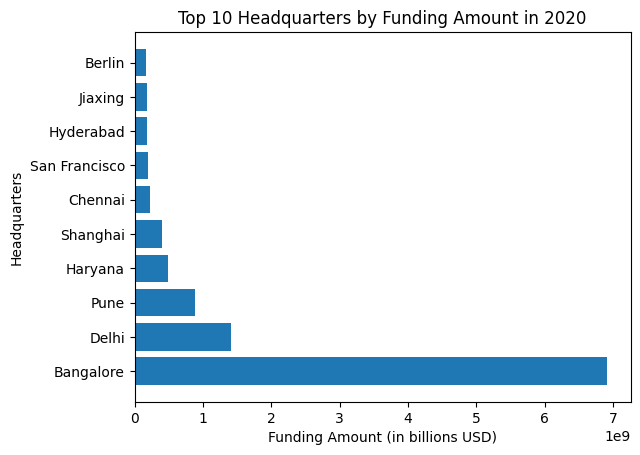

In [341]:
top10_hq = ind_2020.groupby('HeadQuarter')['Amount($)'].sum().sort_values(ascending=False)[:10]

plt.barh(top10_hq.index, top10_hq.values)
plt.title('Top 10 Headquarters by Funding Amount in 2020')
plt.xlabel('Funding Amount (in billions USD)')
plt.ylabel('Headquarters')
plt.show()

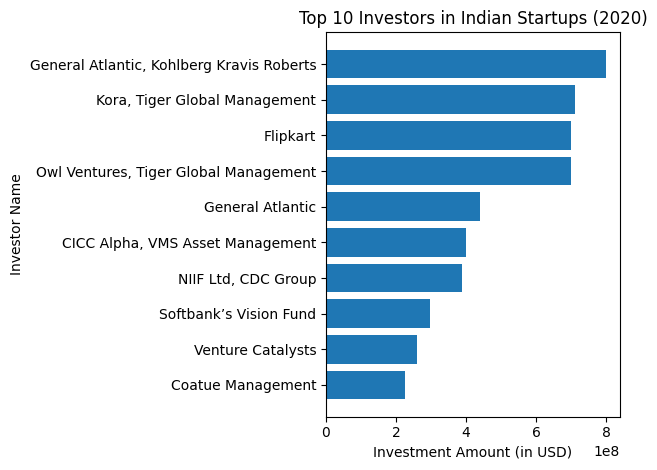

In [342]:
top10_investors = ind_2020.groupby('Investor')['Amount($)'].sum().nlargest(10)

plt.barh(top10_investors.index[::-1], top10_investors.values[::-1])
plt.xlabel('Investment Amount (in USD)')
plt.ylabel('Investor Name')
plt.title('Top 10 Investors in Indian Startups (2020)')
plt.tight_layout()
plt.show()

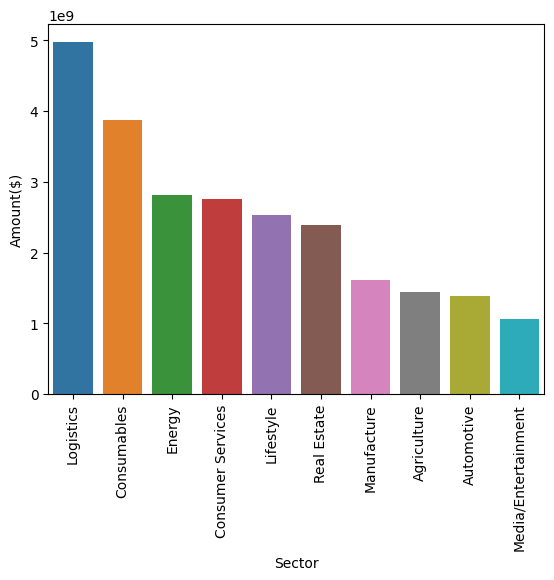

In [343]:
if ind_2020.empty:
    print("No data found for the year 2018")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2018.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


## 2021

## checking the data shape / filling missing values/ creating a date series

In [344]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [345]:
ind_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [346]:
ind_2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [347]:
ind_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
dtype: int64

In [348]:
# replace empty values with NaN
ind_2021['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2021['Year']=2021

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\2320037695.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2021['Sector'].replace('—', pd.np.nan, inplace=True)


In [349]:
ind_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
Year               0
dtype: int64

In [350]:
# create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')

# create a new column 'Date' with random dates within the year 2018
ind_2021['Date'] = np.random.choice(date_range, size=len(ind_2021))

ind_2021 = ind_2021.sort_values('Date')

ind_2021['Date'] = pd.to_datetime(ind_2021['Date'], format='%Y-%m-%d')


## mask to identify rows where the 'Stage' column contains a dollar sign and assigns the value in that row to the 'Amount column,drop specific rows by their index number and assign 'NaN' values 

In [351]:
ind_2021.head(50)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year,Date
787,Captain Fresh,2019.0,Bangalore,Supply chain platform,Captain Fresh is a freshwater fish and seafood...,Utham Gowda,"Matrix Partners India, Ankur Capital","$3,000,000",Seed,2021,2021-01-01
856,SuperOps.ai,2020.0,Chennai,AI startup,SuperOps.ai is an early stage startup in the M...,"Arvind Parthiban, Jayakumar Karumbasalam","Ramakant Sharma, Elevation Capital","$3,000,000",Seed,2021,2021-01-01
1002,Aviom India,2016.0,Bhilwara,Financial Services,AVIOM India Housing Finance Pvt. Ltd. is a ven...,Kajal Ilmi,Sabre Partners,$8000000,Series C,2021,2021-01-01
900,Wingreens Farms,2011.0,Gurugram,Food & Beverages,Wingreens Farms is a fully integrated (farm to...,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",$17000000,NaN,2021,2021-01-02
33,TagZ Foods,2019.0,Bangalore,Food,TagZ Foods is a supplier of snacks and food pr...,"Anish Basu Roy, Sagar Bhalotia",Venture Catalysts,"$500,000",Pre-series A,2021,2021-01-02
1107,VRO Hospitality,2018.0,Bangalore,Hospitality,One of the fastest-growing hospitality compani...,"Safdhar Adoor, Sharath Rice, Dawn Thomas",CreedCap Asia Advisors,$3000000,Series A,2021,2021-01-02
695,Slice,2016.0,Bangalore,FinTech,Slice is India's best credit card challenger t...,Rajan Bajaj,"Gunosy, Blume Ventures",$20000000,NaN,2021,2021-01-03
259,Plix,2018.0,Mumbai,"Health, Wellness & Fitness",Plant-based nutraceutical firm,"Rishubh Satiya, Akash Zaveri","Guild Capital, RPSG Capital Ventures",$5000000,Series A,2021,2021-01-03
50,Do Your Thng,2018.0,Gurugram,Marketing,World's first shared economy platform for digi...,Ankit Agarwal,"Angelbay Holdings, Faad Network","$1,500,000",NaN,2021,2021-01-03
646,XYXX Apparels,2017.0,Surat,Fashion,"XYXX Apparels,which runs an eponymous innerwea...",Yogesh Kabra,NaN,$4000000,Series A,2021,2021-01-03


In [352]:
mask = (~ind_2021['Stage'].isna()) & ind_2021['Stage'].str.contains('\$')
ind_2021.loc[mask, 'Amount($)'] = ind_2021.loc[mask, 'Stage']
ind_2021.loc[mask, 'Stage'] = ''

mask = (~ind_2021['Investor'].isna()) & ind_2021['Investor'].str.contains('\$')
ind_2021.loc[mask, 'Amount($)'] = ind_2021.loc[mask, 'Investor']
ind_2021.loc[mask, 'Investor'] = ''


ind_2021 = ind_2021.drop(111)

ind_2021 = ind_2021.drop(256)

ind_2021.loc[902, 'Investor'] = np.nan

ind_2021.loc[59, 'Investor'] = np.nan

ind_2021.loc[1100, 'Investor'] = np.nan

ind_2021.loc[1148, 'Investor'] = np.nan

In [353]:
ind_2021.head(60)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year,Date
787,Captain Fresh,2019.0,Bangalore,Supply chain platform,Captain Fresh is a freshwater fish and seafood...,Utham Gowda,"Matrix Partners India, Ankur Capital","$3,000,000",Seed,2021,2021-01-01
856,SuperOps.ai,2020.0,Chennai,AI startup,SuperOps.ai is an early stage startup in the M...,"Arvind Parthiban, Jayakumar Karumbasalam","Ramakant Sharma, Elevation Capital","$3,000,000",Seed,2021,2021-01-01
1002,Aviom India,2016.0,Bhilwara,Financial Services,AVIOM India Housing Finance Pvt. Ltd. is a ven...,Kajal Ilmi,Sabre Partners,$8000000,Series C,2021,2021-01-01
900,Wingreens Farms,2011.0,Gurugram,Food & Beverages,Wingreens Farms is a fully integrated (farm to...,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",$17000000,NaN,2021,2021-01-02
33,TagZ Foods,2019.0,Bangalore,Food,TagZ Foods is a supplier of snacks and food pr...,"Anish Basu Roy, Sagar Bhalotia",Venture Catalysts,"$500,000",Pre-series A,2021,2021-01-02
1107,VRO Hospitality,2018.0,Bangalore,Hospitality,One of the fastest-growing hospitality compani...,"Safdhar Adoor, Sharath Rice, Dawn Thomas",CreedCap Asia Advisors,$3000000,Series A,2021,2021-01-02
695,Slice,2016.0,Bangalore,FinTech,Slice is India's best credit card challenger t...,Rajan Bajaj,"Gunosy, Blume Ventures",$20000000,NaN,2021,2021-01-03
259,Plix,2018.0,Mumbai,"Health, Wellness & Fitness",Plant-based nutraceutical firm,"Rishubh Satiya, Akash Zaveri","Guild Capital, RPSG Capital Ventures",$5000000,Series A,2021,2021-01-03
50,Do Your Thng,2018.0,Gurugram,Marketing,World's first shared economy platform for digi...,Ankit Agarwal,"Angelbay Holdings, Faad Network","$1,500,000",NaN,2021,2021-01-03
646,XYXX Apparels,2017.0,Surat,Fashion,"XYXX Apparels,which runs an eponymous innerwea...",Yogesh Kabra,NaN,$4000000,Series A,2021,2021-01-03


In [354]:
ind_2021['HeadQuarter'].ffill(inplace=True)

ind_2021['Stage'] = ind_2021['Stage'].fillna(ind_2021['Stage'].mode()[0])

In [355]:
mode_value = ind_2021['Investor'].mode()[0]
print(mode_value)

Inflection Point Ventures


In [356]:
ind_2021['Investor'] = ind_2021['Investor'].fillna(ind_2021['Investor'].mode()[0])

In [357]:
mode_value = ind_2021['Founders'].mode()[0]
print(mode_value)

Ashneer Grover, Shashvat Nakrani


In [358]:
ind_2021['Founders'] = ind_2021['Founders'].fillna(ind_2021['Founders'].mode()[0])

In [359]:
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].str.replace('New Delhi', 'Delhi')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [360]:
unique_values = ind_2021['HeadQuarter'].unique()
print(unique_values)

['Bangalore' 'Chennai' 'Bhilwara' 'Gurugram' 'Mumbai' 'Surat' 'Delhi'
 'Vadodara' 'Ahmedabad' 'Noida' 'Jodhpur' 'Pune' 'Thane' 'Hyderabad'
 'Cochin' 'Chandigarh' 'Jaipur' 'Online Media\t#REF!' 'New York'
 'Kottayam' 'Kolkata' 'Jharkhand' 'The Nilgiris' 'Kochi' 'Trivandrum'
 'Panchkula' 'Coimbatore' 'Samsitpur' 'Faridabad, Haryana' 'Ahmadabad'
 'Santra' 'Faridabad' 'Gujarat' 'Ghaziabad' 'Goa'
 'Small Towns, Andhra Pradesh' 'Mountain View, CA' 'Food & Beverages'
 'Powai' 'Computer Games' 'West Bengal' 'Roorkee' 'Thiruvananthapuram'
 'Silvassa' 'Mangalore' 'Bhubaneswar' 'Indore' 'Haryana'
 'Pharmaceuticals\t#REF!' 'Telugana' 'Orissia' 'Satara' 'Beijing' 'Nagpur'
 'Ambernath' 'Ranchi' 'Rajsamand' 'Gurugram\t#REF!' 'Andheri'
 'Information Technology & Services' 'Mohali' 'London' 'Panaji'
 'Gandhinagar' 'Lucknow' 'Guwahati' 'Patna' 'Telangana' 'Kanpur']


In [361]:
ind_2021.drop('What it does', axis=1,inplace=True)

## Replacing the missing values in the founded column by using Statiscal means

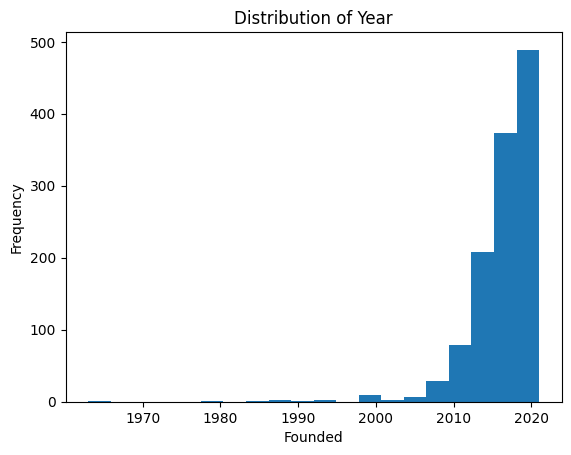

In [362]:
plt.hist(ind_2021['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [363]:
ind_2021['Founded'] = pd.to_numeric(ind_2021['Founded'], errors='coerce')

In [364]:
ind_2021['Founded'] = ind_2021['Founded'].fillna(ind_2021['Founded'].median())

In [365]:
ind_2021.head(50)

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Date
787,Captain Fresh,2019.0,Bangalore,Supply chain platform,Utham Gowda,"Matrix Partners India, Ankur Capital","$3,000,000",Seed,2021,2021-01-01
856,SuperOps.ai,2020.0,Chennai,AI startup,"Arvind Parthiban, Jayakumar Karumbasalam","Ramakant Sharma, Elevation Capital","$3,000,000",Seed,2021,2021-01-01
1002,Aviom India,2016.0,Bhilwara,Financial Services,Kajal Ilmi,Sabre Partners,$8000000,Series C,2021,2021-01-01
900,Wingreens Farms,2011.0,Gurugram,Food & Beverages,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",$17000000,Seed,2021,2021-01-02
33,TagZ Foods,2019.0,Bangalore,Food,"Anish Basu Roy, Sagar Bhalotia",Venture Catalysts,"$500,000",Pre-series A,2021,2021-01-02
1107,VRO Hospitality,2018.0,Bangalore,Hospitality,"Safdhar Adoor, Sharath Rice, Dawn Thomas",CreedCap Asia Advisors,$3000000,Series A,2021,2021-01-02
695,Slice,2016.0,Bangalore,FinTech,Rajan Bajaj,"Gunosy, Blume Ventures",$20000000,Seed,2021,2021-01-03
259,Plix,2018.0,Mumbai,"Health, Wellness & Fitness","Rishubh Satiya, Akash Zaveri","Guild Capital, RPSG Capital Ventures",$5000000,Series A,2021,2021-01-03
50,Do Your Thng,2018.0,Gurugram,Marketing,Ankit Agarwal,"Angelbay Holdings, Faad Network","$1,500,000",Seed,2021,2021-01-03
646,XYXX Apparels,2017.0,Surat,Fashion,Yogesh Kabra,Inflection Point Ventures,$4000000,Series A,2021,2021-01-03


## Filtering & replacing missing values in the the amount col, containing the sector col into categories by putting them in substrings

In [366]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        1
Stage            0
Year             0
Date             0
dtype: int64

In [367]:
# replace empty values with NaN
ind_2021['Amount($)'].replace('', pd.np.nan, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\3156858020.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2021['Amount($)'].replace('', pd.np.nan, inplace=True)


In [368]:
ind_2021['Amount($)'] = ind_2021['Amount($)'].replace('undisclosed', np.nan)

In [369]:
# if it is not already a string, convert it to string
if ind_2021['Amount($)'].dtype != 'object':
    ind_2021['Amount($)'] = ind_2021['Amount($)'].astype(str)

# # remove non-numeric characters from the 'Amount' column
ind_2021['Amount($)'] = ind_2021['Amount($)'].str.replace('[^\d\.]', '')

ind_2021['Amount($)'] = pd.to_numeric(ind_2021['Amount($)'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\803264993.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2021['Amount($)'] = ind_2021['Amount($)'].str.replace('[^\d\.]', '')


In [370]:
# Replace NaN values with 0
ind_2021['Amount($)'] = ind_2021['Amount($)'].fillna(0)

In [371]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Date             0
dtype: int64

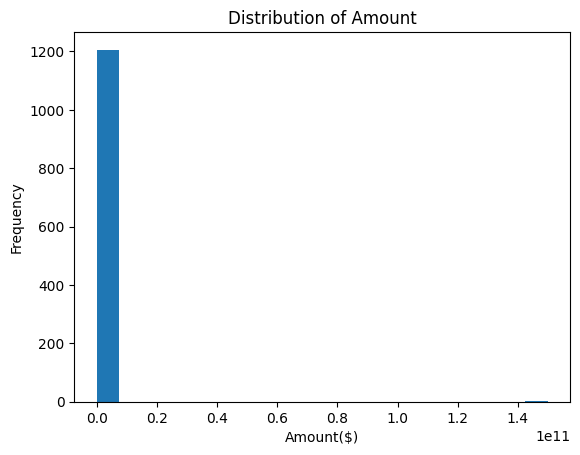

In [372]:
plt.hist(ind_2021['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

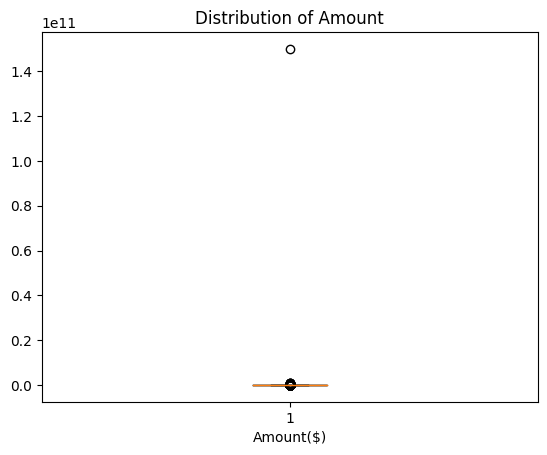

In [373]:
plt.boxplot(ind_2021['Amount($)'])
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.show()

In [374]:
ind_2021['Amount($)'].replace(0, np.nan, inplace=True)

In [375]:
# Fill missing values with median value
ind_2021['Amount($)'].fillna(ind_2021['Amount($)'].mean(), inplace=True)

ind_2021['Amount($)'] = ind_2021['Amount($)'].astype(int)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [376]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Date             0
dtype: int64

In [377]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Date
787,Captain Fresh,2019.0,Bangalore,Supply chain platform,Utham Gowda,"Matrix Partners India, Ankur Capital",3000000,Seed,2021,2021-01-01
856,SuperOps.ai,2020.0,Chennai,AI startup,"Arvind Parthiban, Jayakumar Karumbasalam","Ramakant Sharma, Elevation Capital",3000000,Seed,2021,2021-01-01
1002,Aviom India,2016.0,Bhilwara,Financial Services,Kajal Ilmi,Sabre Partners,8000000,Series C,2021,2021-01-01
900,Wingreens Farms,2011.0,Gurugram,Food & Beverages,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",17000000,Seed,2021,2021-01-02
33,TagZ Foods,2019.0,Bangalore,Food,"Anish Basu Roy, Sagar Bhalotia",Venture Catalysts,500000,Pre-series A,2021,2021-01-02


In [378]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
Game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2021['Sector_clean'] = 'Other'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [379]:
# replace the value in row  of Column1 with NaN & fill/replace with mode

ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Food & Beverages', np.nan)
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Pharmaceuticals\t#REF!', np.nan)
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Online Media#REF!', np.nan)
ind_2021.loc[98, 'HeadQuarter'] = np.nan
ind_2021.loc[1100, 'HeadQuarter'] = np.nan

ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Gurugram\t#REF!', 'Gurugram')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Information Technology & Services', 'Manchester')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Mountain View, CA', 'California')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Faridabad, Haryana', 'Haryana')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Small Towns, Andhra Pradesh', 'Andhra Pradesh')


ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].fillna(ind_2021['HeadQuarter'].mode()[0])


In [380]:
# filling the gaps with appropriate naming convention

ind_2021['Sector'] = ind_2021['Sector'].replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.', 'Healthcare')
ind_2021['Sector'] = ind_2021['Sector'].replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.', 'Healthcare')   
ind_2021['Sector'] = ind_2021['Sector'].replace('MoEVing is Indias only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.', 'Energy')


In [381]:
unique_values = ind_2021['HeadQuarter'].unique()
print(unique_values)

['Bangalore' 'Chennai' 'Bhilwara' 'Gurugram' 'Mumbai' 'Surat' 'Delhi'
 'Vadodara' 'Ahmedabad' 'Noida' 'Jodhpur' 'Pune' 'Thane' 'Hyderabad'
 'Cochin' 'Chandigarh' 'Jaipur' 'New York' 'Kottayam' 'Kolkata'
 'Jharkhand' 'The Nilgiris' 'Kochi' 'Trivandrum' 'Panchkula' 'Coimbatore'
 'Samsitpur' 'Haryana' 'Ahmadabad' 'Santra' 'Faridabad' 'Gujarat'
 'Ghaziabad' 'Goa' 'Andhra Pradesh' 'California' 'Powai' 'West Bengal'
 'Roorkee' 'Thiruvananthapuram' 'Silvassa' 'Mangalore' 'Bhubaneswar'
 'Indore' 'Telugana' 'Orissia' 'Satara' 'Beijing' 'Nagpur' 'Ambernath'
 'Ranchi' 'Rajsamand' 'Andheri' 'Manchester' 'Mohali' 'London' 'Panaji'
 'Gandhinagar' 'Lucknow' 'Guwahati' 'Patna' 'Telangana' 'Kanpur']


In [382]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Date,Sector_clean
787,Captain Fresh,2019.0,Bangalore,Supply chain platform,Utham Gowda,"Matrix Partners India, Ankur Capital",3000000,Seed,2021,2021-01-01,Other
856,SuperOps.ai,2020.0,Chennai,AI startup,"Arvind Parthiban, Jayakumar Karumbasalam","Ramakant Sharma, Elevation Capital",3000000,Seed,2021,2021-01-01,Technology
1002,Aviom India,2016.0,Bhilwara,Financial Services,Kajal Ilmi,Sabre Partners,8000000,Series C,2021,2021-01-01,Finance
900,Wingreens Farms,2011.0,Gurugram,Food & Beverages,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",17000000,Seed,2021,2021-01-02,Consumables
33,TagZ Foods,2019.0,Bangalore,Food,"Anish Basu Roy, Sagar Bhalotia",Venture Catalysts,500000,Pre-series A,2021,2021-01-02,Consumables


In [383]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Date             0
Sector_clean     0
dtype: int64

In [384]:
ind_2021.drop(ind_2021.columns[-8], axis=1,inplace=True)

In [385]:
ind_2021= ind_2021.rename(columns={'Sector_clean': 'Sector'})

In [386]:
ind_2021['Founded'] = ind_2021['Founded'].astype(int)

In [387]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Date,Sector
787,Captain Fresh,2019,Bangalore,Utham Gowda,"Matrix Partners India, Ankur Capital",3000000,Seed,2021,2021-01-01,Other
856,SuperOps.ai,2020,Chennai,"Arvind Parthiban, Jayakumar Karumbasalam","Ramakant Sharma, Elevation Capital",3000000,Seed,2021,2021-01-01,Technology
1002,Aviom India,2016,Bhilwara,Kajal Ilmi,Sabre Partners,8000000,Series C,2021,2021-01-01,Finance
900,Wingreens Farms,2011,Gurugram,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",17000000,Seed,2021,2021-01-02,Consumables
33,TagZ Foods,2019,Bangalore,"Anish Basu Roy, Sagar Bhalotia",Venture Catalysts,500000,Pre-series A,2021,2021-01-02,Consumables


In [388]:
ind_2021.set_index('Date',inplace=True)

## Ploting visuals to check the shape of the dataframe

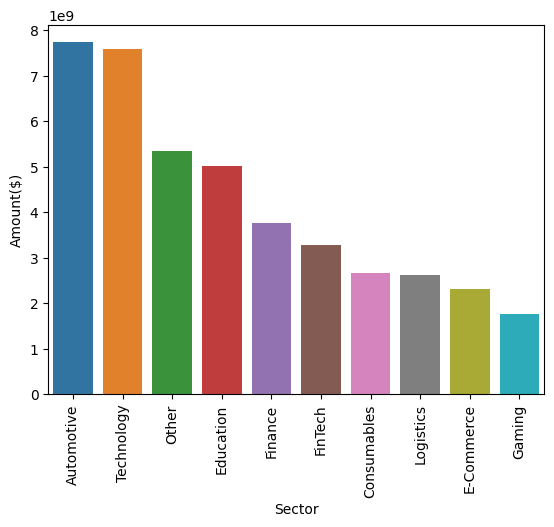

In [389]:
if ind_2021.empty:
    print("No data found for the year 2021")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2021.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


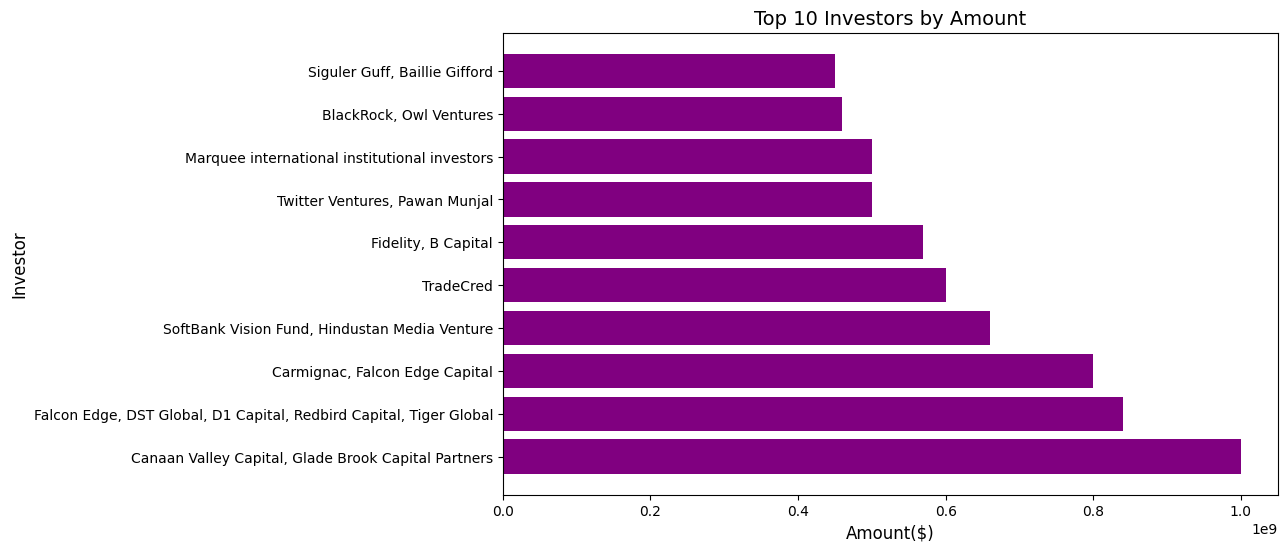

In [390]:
# sort the dataframe by amount in descending order and select the top 10 investors
top_investors = ind_2021.sort_values(by='Amount($)', ascending=False).head(10)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_investors['Investor'], top_investors['Amount($)'], color='purple')

ax.set_xlabel('Amount($)', fontsize=12)

ax.set_ylabel('Investor', fontsize=12)

ax.set_title('Top 10 Investors by Amount', fontsize=14)

plt.show()

## filling missing values in 2018 with merged data, checking the correlation,converting amount col to float

In [391]:
# Compute the correlation matrix
combined_ind = pd.concat([ind_2019, ind_2020, ind_2021], axis=0)

correlation_matrix = combined_ind.corr()

print(correlation_matrix)

            Founded  Amount($)      Year
Founded    1.000000   0.038671  0.151788
Amount($)  0.038671   1.000000  0.110487
Year       0.151788   0.110487  1.000000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\3183379573.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_ind.corr()


In [392]:
ind_2018.isna().sum()

Company/Brand      0
Stage              0
Amount($)          0
Year               0
Founded          526
HeadQuarter        0
Sector             0
dtype: int64

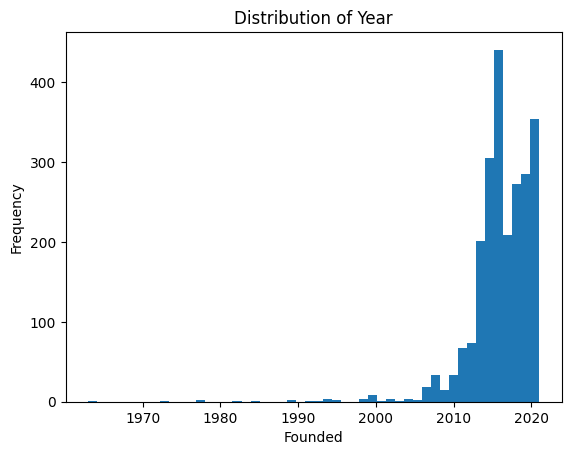

In [393]:
plt.hist(combined_ind['Founded'], bins=50)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [394]:
# Calculate the median of the column
median_value = combined_ind['Founded'].median()

In [395]:
ind_2018['Founded'].fillna(median_value, inplace=True)

In [396]:
ind_2018.isna().sum()

Company/Brand    0
Stage            0
Amount($)        0
Year             0
Founded          0
HeadQuarter      0
Sector           0
dtype: int64

In [397]:
ind_2018['Founded'] = ind_2018['Founded'].astype(int)

In [398]:
ind_2018.head()

,Company/Brand,Stage,Amount($),Year,Founded,HeadQuarter,Sector
Date,,,,,,,
2018-01-01,Guiddoo World,Seed,800000,2018,2016,Mumbai,Logistics
2018-01-01,Verloop,Series A,3000000,2018,2016,Bangalore,Technology
2018-01-01,Chizel,Seed,5800000,2018,2016,Pune,Manufacture
2018-01-02,MCaffeine,Seed,32000000,2018,2016,Mumbai,Consumer Services
2018-01-04,Tricog Health Services Pvt Ltd,Series A,4000000,2018,2016,Bangalore,Automotive


In [399]:
ind_2018["Amount($)"] = ind_2018["Amount($)"].astype(float)

ind_2019["Amount($)"] = ind_2019["Amount($)"].astype(float)

ind_2020["Amount($)"] = ind_2020["Amount($)"].astype(float)

ind_2021["Amount($)"] = ind_2021["Amount($)"].astype(float)

## Some more data cleaning in the HeadQuarter column

In [400]:
# concatenate all the dataframes into one
ind_st2 = pd.concat([ind_2018, ind_2019, ind_2020, ind_2021], ignore_index=True)

In [401]:
# replace "Bengaluru" with "Bangalore" in the "headquarter" column
ind_st2['HeadQuarter'] = ind_st2['HeadQuarter'].str.replace('Bombay', 'Mumbai')

In [402]:
ind_st2['Stage'] = ind_st2['Stage'].fillna(ind_st2['Stage'].mode()[0])

In [403]:
# Drop rows with the value "Sochcast" in the "Company/Brand" column in-place
ind_2021.drop(ind_2021[ind_2021['Company/Brand'] == 'Sochcast'].index, inplace=True)

In [404]:
unique_values = ind_2021['HeadQuarter'].unique()
print(unique_values)

['Bangalore' 'Chennai' 'Bhilwara' 'Gurugram' 'Mumbai' 'Surat' 'Delhi'
 'Vadodara' 'Ahmedabad' 'Noida' 'Jodhpur' 'Pune' 'Thane' 'Hyderabad'
 'Cochin' 'Chandigarh' 'Jaipur' 'New York' 'Kottayam' 'Kolkata'
 'Jharkhand' 'The Nilgiris' 'Kochi' 'Trivandrum' 'Panchkula' 'Coimbatore'
 'Samsitpur' 'Haryana' 'Ahmadabad' 'Santra' 'Faridabad' 'Gujarat'
 'Ghaziabad' 'Goa' 'Andhra Pradesh' 'California' 'Powai' 'West Bengal'
 'Roorkee' 'Thiruvananthapuram' 'Silvassa' 'Mangalore' 'Bhubaneswar'
 'Indore' 'Telugana' 'Orissia' 'Satara' 'Beijing' 'Nagpur' 'Ambernath'
 'Ranchi' 'Rajsamand' 'Andheri' 'Manchester' 'Mohali' 'London' 'Panaji'
 'Gandhinagar' 'Lucknow' 'Guwahati' 'Patna' 'Telangana' 'Kanpur']


In [405]:
ind_st2['HeadQuarter'] = ind_st2['HeadQuarter'].str.replace('Bengaluru', 'Bangalore')

In [406]:
unique_values = ind_st2['HeadQuarter'].unique()
print(unique_values)

['Mumbai' 'Bangalore' 'Pune' 'Delhi' 'Noida' 'Jaipur' 'Kolkata' 'Gurugram'
 'Chennai' 'Mohali' 'Bhopal' 'Andheri' 'Thane' 'Hyderabad' 'Ahmedabad'
 'Ghaziabad' 'Haryana' 'Alwar' 'Faridabad' 'Kormangala' 'Uttar Pradesh'
 'Margão' 'Anand' 'India' 'Guindy' 'Coimbatore' 'Indore' 'Ernakulam'
 'Chandigarh' 'Kannur' 'Mylapore' 'Kota' 'Worli' 'Alleppey' 'Kochi'
 'Trivandrum' 'Belgaum' 'Lucknow' 'Hubli' 'Kalpakkam' 'Kanpur' 'Powai'
 'Jodhpur' 'Guntur' 'Cochin' 'Kalkaji' 'Azadpur' 'Rajasthan'
 'Uttar pradesh' 'Surat' 'Telangana' 'Goa' 'France' 'Shanghai' 'Biphar'
 'Texas' 'Patna' 'San Francisco' 'Riyadh' 'California' 'Seattle'
 'Rajastan' 'Gujarat' 'Newcastle' 'Singapore' 'Dehradun' 'Tamilnadu'
 'Bihar' 'Paris' 'Kerala' 'San Ramon' 'Bangkok' 'Karnataka' 'Odisha'
 'New York' 'Queensland' 'Ludhiana' 'Sydney' 'Jiaxing' 'Berlin'
 'Hyderebad' 'Seoul' 'London' 'Bangaldesh' 'San Franciscao' 'Tamil Nadu'
 'Jawa Barat' 'Warangal' 'Milano' 'Bhilwara' 'Vadodara' 'Kottayam'
 'Jharkhand' 'The Nilgiris' 'Panch

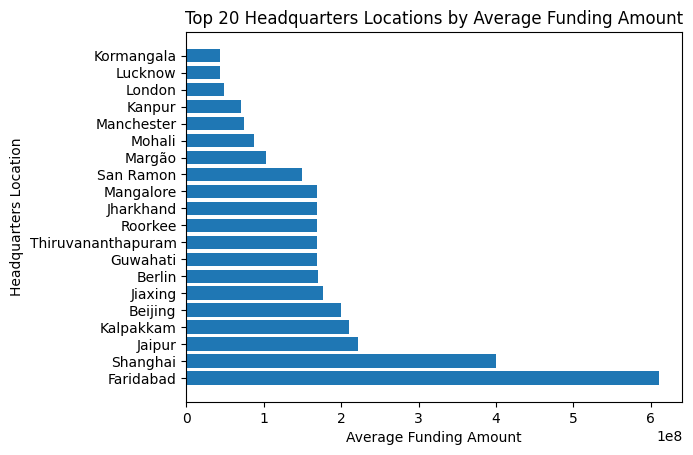

In [407]:
# Group the data by headquarters location and calculate the average funding amount
grouped = ind_st2.groupby('HeadQuarter')['Amount($)'].mean()

# Sort the data by average funding amount in descending order
grouped = grouped.sort_values(ascending=False)

# Select the top 20 headquarters locations
top_20 = grouped[:20]

# Create a horizontal bar chart to visualize the relationship between headquarters location and funding amounts
plt.barh(top_20.index, top_20.values)
plt.xlabel('Average Funding Amount')
plt.ylabel('Headquarters Location')
plt.title('Top 20 Headquarters Locations by Average Funding Amount')

# Display the plot
plt.show()


In [408]:
# save dataframe to a CSV file
ind_2018.to_csv('clean-startup-2018.csv',index_label='Date')
ind_2019.to_csv('clean-startup-2019.csv',index_label='Date')
ind_2020.to_csv('clean-startup-2020.csv',index_label='Date')
ind_2021.to_csv('clean-startup-2021.csv',index_label='Date')

# EXPLOLATORY DATA ANALYSIS OF CONCATENATED DATA(EDA)

In [440]:
# Concatenate all years into a single dataframe
idn = pd.concat([ind_2018, ind_2019, ind_2020, ind_2021])

In [410]:
idn

,Company/Brand,Stage,Amount($),Year,Founded,HeadQuarter,Sector,Founders,Investor
Date,,,,,,,,,
2018-01-01,Guiddoo World,Seed,800000.0,2018,2016,Mumbai,Logistics,NaN,NaN
2018-01-01,Verloop,Series A,3000000.0,2018,2016,Bangalore,Technology,NaN,NaN
2018-01-01,Chizel,Seed,5800000.0,2018,2016,Pune,Manufacture,NaN,NaN
2018-01-02,MCaffeine,Seed,32000000.0,2018,2016,Mumbai,Consumer Services,NaN,NaN
2018-01-04,Tricog Health Services Pvt Ltd,Series A,4000000.0,2018,2016,Bangalore,Automotive,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-30,Log 9 Materials,Seed,2000000.0,2021,2014,Bangalore,Technology,Akshay Singhal,Petronas Ventures
2021-12-30,Lido Learning,Seed,10000000.0,2021,2019,Mumbai,Other,Sahil Sheth,Unilazer Ventures
2021-12-31,KreditBee,Seed,75000000.0,2021,2018,Bangalore,FinTech,"Karthikeyan Krishnaswamy, Madhusudan Ekambaram...","Alpine Capital, PremjiInvest"


In [411]:
#converting Amount column to datatype float
idn["Amount($)"].astype("float")

Date
2018-01-01       800000.0
2018-01-01      3000000.0
2018-01-01      5800000.0
2018-01-02     32000000.0
2018-01-04      4000000.0
                 ...     
2021-12-30      2000000.0
2021-12-30     10000000.0
2021-12-31     75000000.0
2021-12-31      5000000.0
2021-12-31    250000000.0
Name: Amount($), Length: 2872, dtype: float64

In [412]:
#describe the data 
idn.describe()


,Amount($),Year,Founded
count,2.872000e+03,2872.000000,2872.000000
mean,2.939064e+07,2020.022284,2016.052925
std,1.961681e+08,1.087687,3.739607
min,-2.147484e+09,2018.000000,1963.000000
25%,1.200000e+06,2020.000000,2015.000000
50%,4.000000e+06,2020.000000,2016.000000
75%,1.800000e+07,2021.000000,2018.000000
max,2.029600e+09,2021.000000,2021.000000


In [413]:
idn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2872 entries, 2018-01-01 to 2021-12-31
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2872 non-null   object 
 1   Stage          2872 non-null   object 
 2   Amount($)      2872 non-null   float64
 3   Year           2872 non-null   int64  
 4   Founded        2872 non-null   int32  
 5   HeadQuarter    2872 non-null   object 
 6   Sector         2872 non-null   object 
 7   Founders       2346 non-null   object 
 8   Investor       2346 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 213.2+ KB


In [414]:

# Check for missing values
print(idn.isnull().sum())

Company/Brand      0
Stage              0
Amount($)          0
Year               0
Founded            0
HeadQuarter        0
Sector             0
Founders         526
Investor         526
dtype: int64


In [415]:
#filling missing categorical data on founders using imputer methord

# Create an instance of SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on founders column
imputer.fit(idn[['Founders']])

# Transform the data 
idn['Founders'] = imputer.transform(idn[['Founders']])


In [416]:
#filling missing categorical data on Investor using imputer methord

# Create an instance of SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on Investor column
imputer.fit(idn[['Investor']])

# Transform the data 
idn['Investor'] = imputer.transform(idn[['Investor']])

In [417]:
print(idn.isnull().sum())

Company/Brand    0
Stage            0
Amount($)        0
Year             0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
dtype: int64


# Univariate analysis
###  It only analyzes one variable, which is the 'Amount($)' column

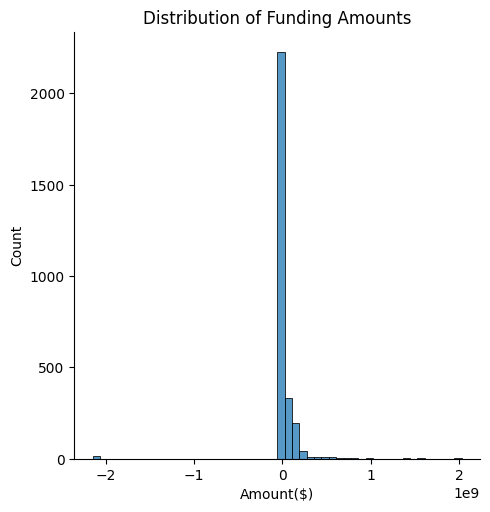

In [418]:
# Plot the distribution of funding amounts
idn = idn.reset_index(drop=True)
sns.displot(data=idn, x='Amount($)', bins=50)
plt.title('Distribution of Funding Amounts')
plt.show()


 The histogram is divided into 50 bins, which gives an idea of how the funding amounts are distributed across different ranges

 # Univariate analysis 
 ### As it only analyzes the distribution of startups across different sectors.

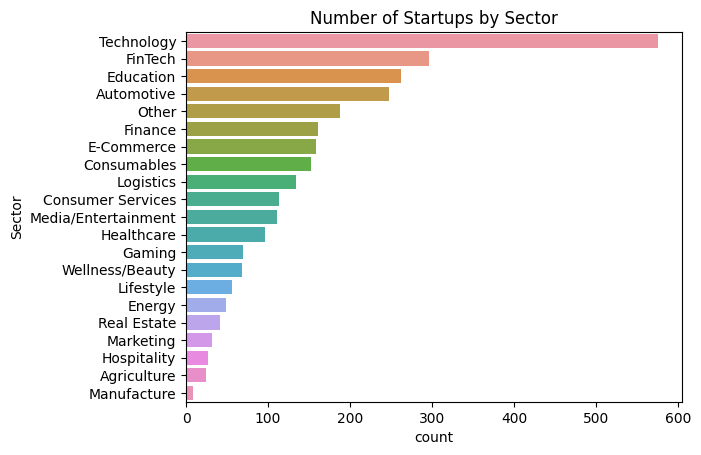

In [419]:
# Get the value counts for each sector and sort them in descending order
sector_counts = idn['Sector'].value_counts().sort_values(ascending=False)

# Plot the countplot with sorted bars
sns.countplot(data=idn, y='Sector', order=sector_counts.index)
plt.title('Number of Startups by Sector')
plt.show()


This visualization helps to identify which sectors have the highest number of startups and compare their relative popularity.

# Univariate analysis of
### Funding amount by sector

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\728845482.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=idn, y='Sector', x='Amount($)', estimator=np.sum, ci=None, order=sector_order)


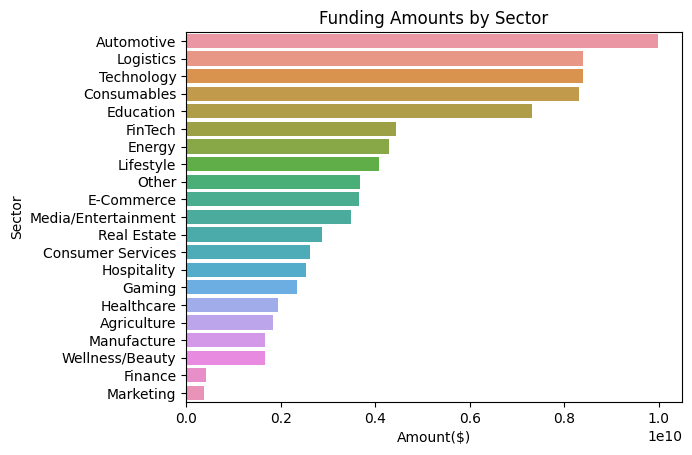

In [420]:
# Sort the sectors by funding amount in descending order
sector_order = idn.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).index

# Plot the funding amounts by sector in descending order
sns.barplot(data=idn, y='Sector', x='Amount($)', estimator=np.sum, ci=None, order=sector_order)
plt.title('Funding Amounts by Sector')
plt.show()

The above chart  shows the sector with the highest total funding amount is Automotive, followed by Technology and Logistics.
    Consumables and Education sectors also received significant funding amounts, while other sectors received comparatively lower funding amounts.

 # Univariate analysis.
 ### It is analyzing the frequency distribution of startups by funding stage.

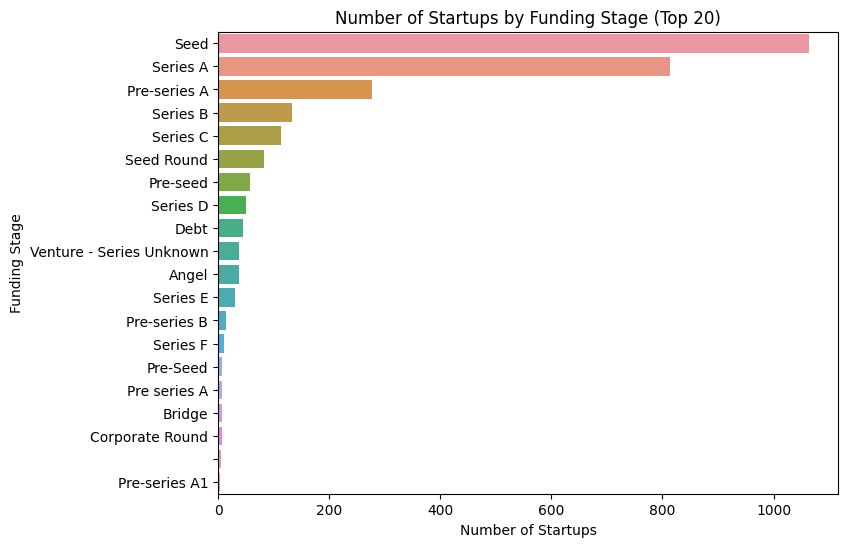

In [421]:
plt.figure(figsize=(8, 6))
sns.countplot(data=idn, y='Stage', order=idn['Stage'].value_counts().index[:20])
plt.title('Number of Startups by Funding Stage (Top 20)')
plt.xlabel('Number of Startups')
plt.ylabel('Funding Stage')
plt.show()


In the above chart The finding is that the majority of startups in the dataset are in the Seed and Series A funding stages, with a sharp decline in the number of startups in later funding stages such as Series E and beyond.

# Univariate analysis.
 ### showing the total funding amount for each funding stage. The y-axis represents the funding stage and the x-axis represents the total funding amount.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\297862668.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=idn, y='Stage', x='Amount($)', estimator=np.sum, ci=None, order=idn.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).index[:20])


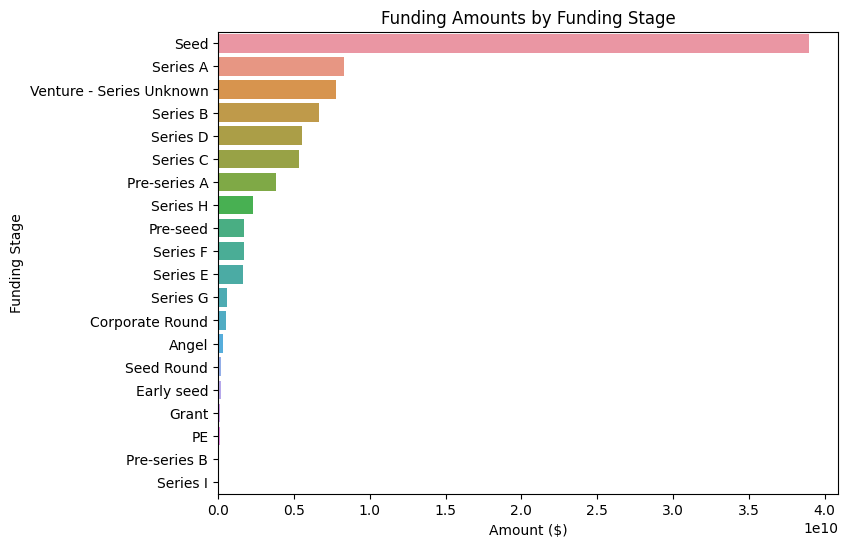

In [422]:
plt.figure(figsize=(8, 6))
sns.barplot(data=idn, y='Stage', x='Amount($)', estimator=np.sum, ci=None, order=idn.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).index[:20])
plt.title('Funding Amounts by Funding Stage')
plt.xlabel('Amount ($)')
plt.ylabel('Funding Stage')
plt.show()




The findings from the above chart suggest that Seed Funding is the most common funding stage for Indian startups, followed by Series A and Series B. The total funding amount gradually increases as the funding stage advances from Seed to Series F

 # Univariate  analysis
 ### As it is analyzing the number of startups in each location without considering any other variable.


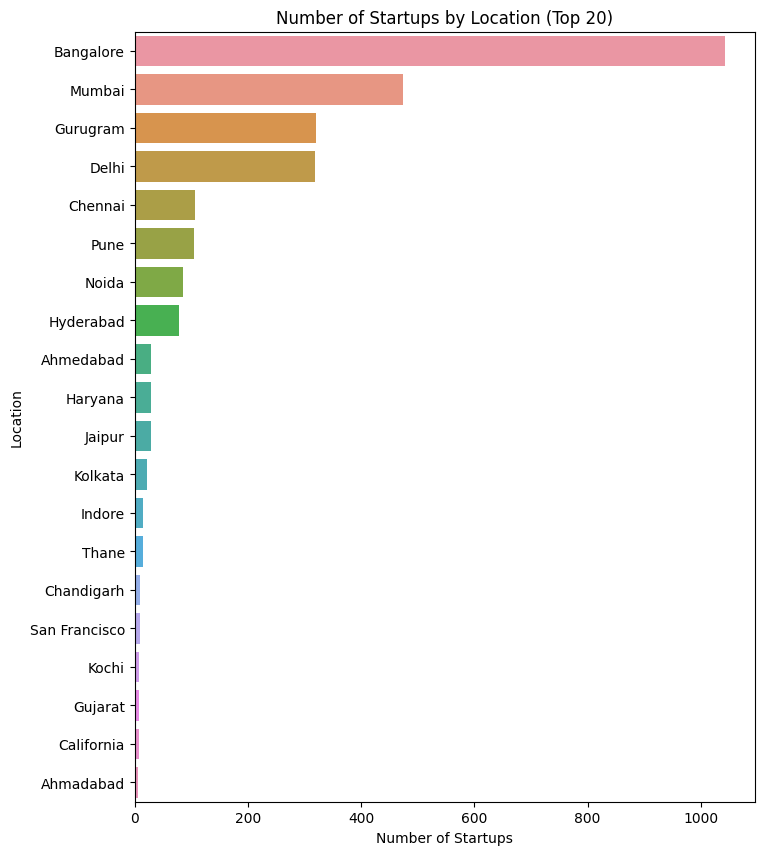

In [423]:
plt.figure(figsize=(8, 10))
sns.countplot(data=idn, y='HeadQuarter', order=idn['HeadQuarter'].value_counts().iloc[:20].index)
plt.title('Number of Startups by Location (Top 20)')
plt.xlabel('Number of Startups')
plt.ylabel('Location')
plt.show()



Bangalore is the top location for startups with more than 3000 startups in the dataset.
Mumbai and Delhi are the next two most popular locations with more than 1500 startups each.
Other popular locations for startups include Hyderabad, Chennai, Pune, and Gurgaon.

# Univariate analysis of
### funding by top 20 headquarter  locations

In [424]:
funding_amount = idn['HeadQuarter']
print(funding_amount)


0          Mumbai
1       Bangalore
2            Pune
3          Mumbai
4       Bangalore
          ...    
2867    Bangalore
2868       Mumbai
2869    Bangalore
2870    Bangalore
2871        Delhi
Name: HeadQuarter, Length: 2872, dtype: object


In [425]:
distinct_stages = idn['HeadQuarter'].unique()
print(distinct_stages)


['Mumbai' 'Bangalore' 'Pune' 'Delhi' 'Noida' 'Jaipur' 'Kolkata' 'Gurugram'
 'Chennai' 'Mohali' 'Bhopal' 'Andheri' 'Thane' 'Hyderabad' 'Ahmedabad'
 'Ghaziabad' 'Haryana' 'Alwar' 'Faridabad' 'Kormangala' 'Uttar Pradesh'
 'Margão' 'Anand' 'India' 'Guindy' 'Coimbatore' 'Indore' 'Ernakulam'
 'Chandigarh' 'Kannur' 'Mylapore' 'Kota' 'Worli' 'Alleppey' 'Kochi'
 'Trivandrum' 'Belgaum' 'Lucknow' 'Hubli' 'Kalpakkam' 'Kanpur' 'Powai'
 'Jodhpur' 'Guntur' 'Cochin' 'Kalkaji' 'Azadpur' 'Rajasthan'
 'Uttar pradesh' 'Surat' 'Telangana' 'Goa' 'France' 'Shanghai' 'Biphar'
 'Texas' 'Patna' 'San Francisco' 'Riyadh' 'California' 'Seattle'
 'Rajastan' 'Gujarat' 'Newcastle' 'Singapore' 'Dehradun' 'Tamilnadu'
 'Bihar' 'Paris' 'Kerala' 'San Ramon' 'Bangkok' 'Karnataka' 'Odisha'
 'New York' 'Queensland' 'Ludhiana' 'Sydney' 'Jiaxing' 'Berlin'
 'Hyderebad' 'Seoul' 'London' 'Bangaldesh' 'Bengaluru' 'San Franciscao'
 'Tamil Nadu' 'Jawa Barat' 'Warangal' 'Milano' 'Bhilwara' 'Vadodara'
 'Kottayam' 'Jharkhand' 'The Nilg

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\2863135263.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=idn, y='HeadQuarter', x='Amount($)', estimator=np.sum, ci=None, order=top20_locations)


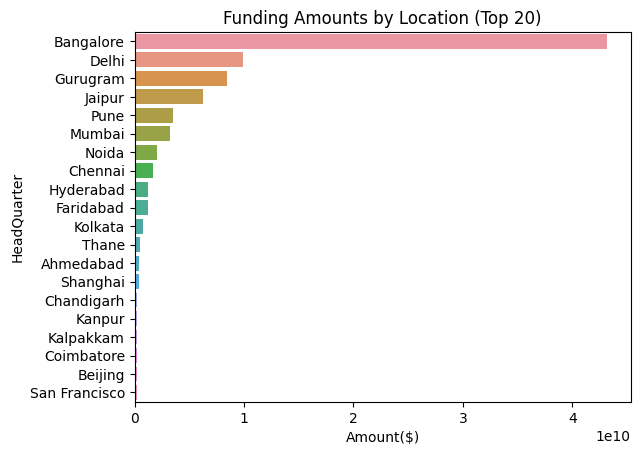

In [426]:
top20_locations = idn.groupby('HeadQuarter')['Amount($)'].sum().sort_values(ascending=False).head(20).index.tolist()

sns.barplot(data=idn, y='HeadQuarter', x='Amount($)', estimator=np.sum, ci=None, order=top20_locations)
plt.title('Funding Amounts by Location (Top 20)')
plt.show()




There is a significant difference between the total funding received by the top location and the other locations on the above chart indicating that certain locations may receive more funding than others. The bar chart provides a quick and easy way to visually compare the total funding received by the top 20 headquarter locations.

In [427]:
distinct_stages = idn['Stage'].unique()
print(distinct_stages)

['Seed' 'Series A' 'Angel' 'Venture - Series Unknown' 'Series B'
 'Series E' 'Series C' 'Post-IPO Equity' 'Grant' 'Corporate Round'
 'Series D' 'Pre-Seed' 'Series H' 'Seed funding' 'Pre series A'
 'Series B+' 'Pre-series A' 'Seed round' 'Seed fund' 'Series F' 'Series G'
 'Fresh funding' 'Post series A' 'Edge' 'Seed Round' 'Bridge Round'
 'Angel Round' 'Bridge' 'Debt' 'Pre-series C' 'Pre series B' 'Series D1'
 'Seed A' 'Pre seed Round' 'Mid series' 'Series B2' 'Seed Funding'
 'Pre-seed' 'Pre-seed Round' 'Pre series C' 'Pre-Series B'
 'Seed Investment' 'Pre- series A' 'Series A-1' 'Pre-series' 'Series C, D'
 'Series E2' 'Pre-series B' 'Pre-series A1' 'Series B3' 'Series F1'
 'Early seed' 'Seies A' 'PE' '' 'Seed+' 'Series I' 'Series A+' 'Series A2'
 'Series F2']


# Univariate analysis of
### Funding amount by funding stage
 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\2072036851.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=idn, y='Stage', x='Amount($)', estimator=np.sum, ci=None, order=idn.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).index[:20])


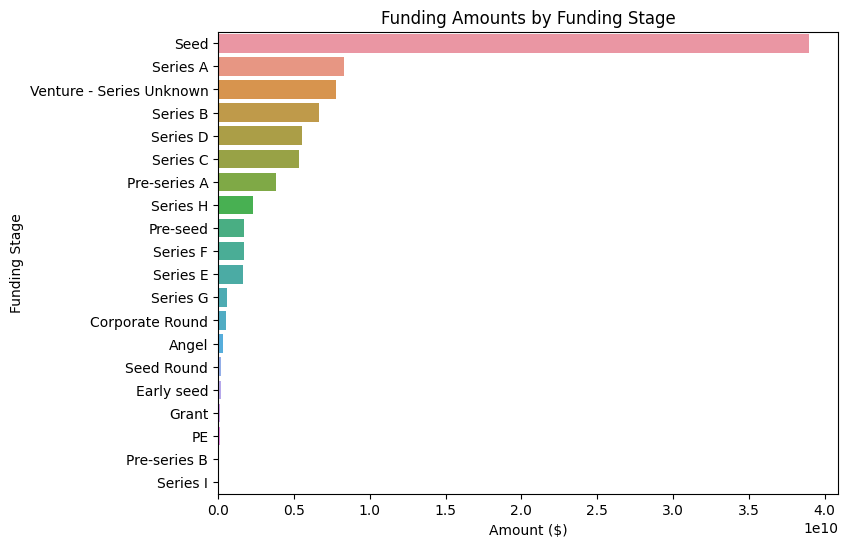

In [428]:
plt.figure(figsize=(8, 6))
sns.barplot(data=idn, y='Stage', x='Amount($)', estimator=np.sum, ci=None, order=idn.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).index[:20])
plt.title('Funding Amounts by Funding Stage')
plt.xlabel('Amount ($)')
plt.ylabel('Funding Stage')
plt.show()

In the above chart the funding stage that received the most funding is "Seed". The funding amounts decrease as the stage of development advances, with "Series A" receiving the second highest amount of funding, followed by "Series B". The funding amounts for each stage after "Series B" continue to decrease

# Bivariate Analysis 
### It plots the correlation between two variables - Stage of Development and Funding Amount.

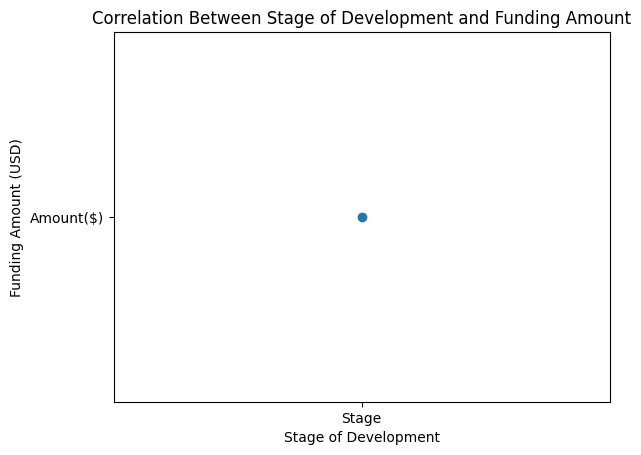

In [429]:
# Create scatter plot
plt.scatter('Stage', 'Amount($)')

# Set axis labels and title
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount (USD)')
plt.title('Correlation Between Stage of Development and Funding Amount')

# Show the plot
plt.show()


 # Bivariate Analysis
### it is exploring the relationship between two variables: Stage of Development and Funding Amount, while also considering the third variable of Year through color-coding.

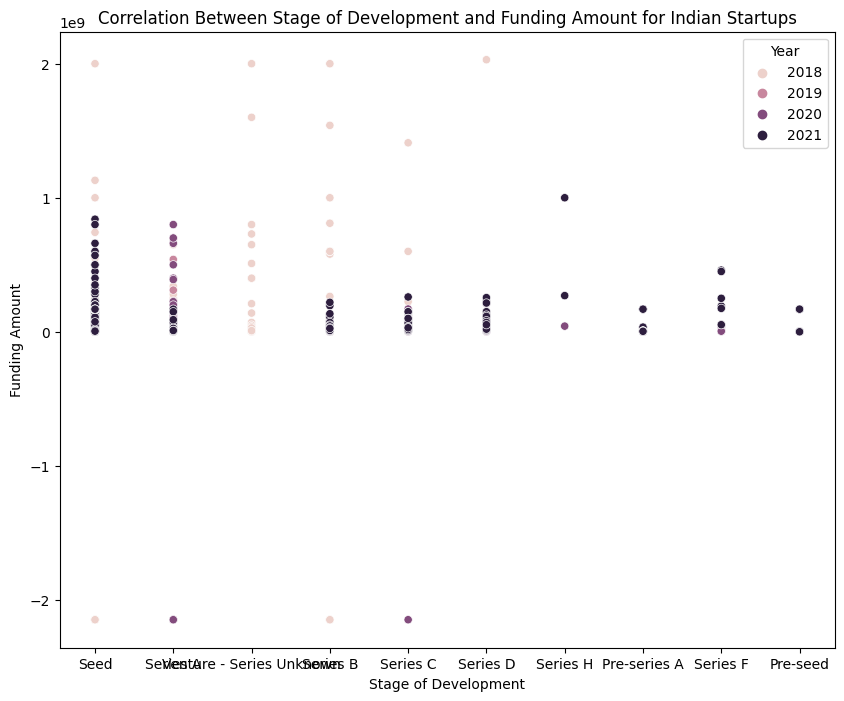

In [430]:
# Filter top 10 stages by funding amount
top10_stages = idn.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).head(10).index.tolist()
idn_filtered = idn[idn['Stage'].isin(top10_stages)]

# Create scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=idn_filtered, x='Stage', y='Amount($)', hue='Year')
plt.title('Correlation Between Stage of Development and Funding Amount for Indian Startups')
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount')
plt.show()

The scatter plot above shows that the funding amount generally increases as the stage of development progresses, with later stages such as Growth and Expansion receiving the highest amount of funding. Additionally, there appears to be an increasing trend in funding amount over the years, with higher amounts being received in more recent years.

# Univariate Analysis of
### Total funding by sector

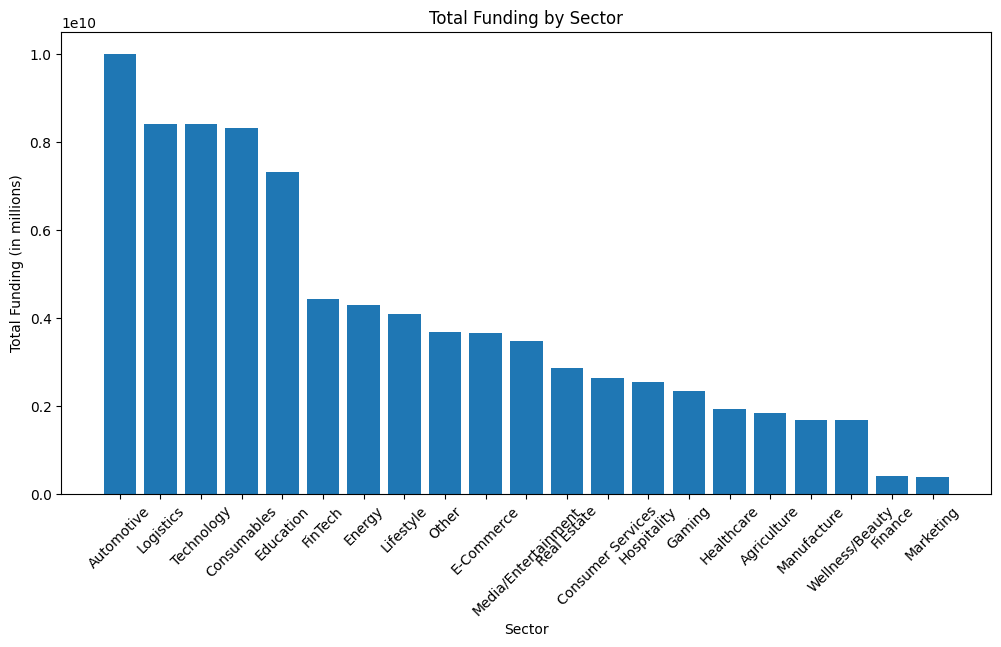

In [431]:

# group the data by sector and calculate the sum of funding
funding_by_sector = idn.groupby('Sector')['Amount($)'].sum().reset_index()

# sort the data by total funding in descending order
funding_by_sector = funding_by_sector.sort_values(by='Amount($)', ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(funding_by_sector['Sector'], funding_by_sector['Amount($)'])
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Total Funding (in millions)')
plt.title('Total Funding by Sector')
plt.show()




On the above plot we can see that Automotive sector receives the highest funding whereas Marketing sector receives the least funding

# Univariate analysis of
### Pattern in location of top 10 companys headquarters and the amount of funding they receive

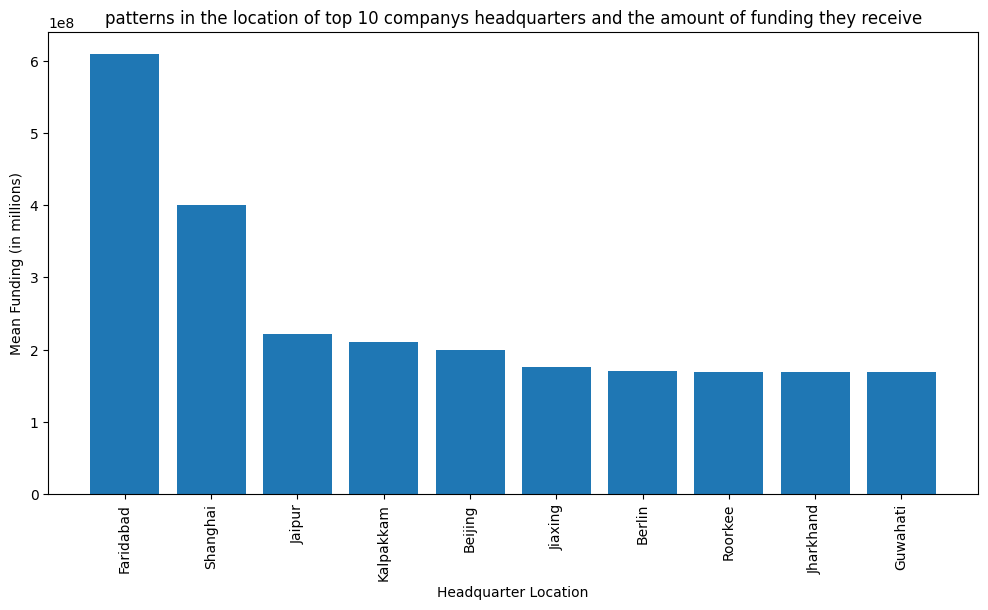

In [432]:

# group the data by headquarter location and calculate the mean funding
funding_by_location = idn.groupby('HeadQuarter')['Amount($)'].mean().reset_index()

# sort the data by mean funding in descending order
funding_by_location = funding_by_location.sort_values(by='Amount($)', ascending=False)
# select the top 10 locations
top_10_locations = funding_by_location[:10]
# plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_locations['HeadQuarter'], top_10_locations['Amount($)'])
plt.xticks(rotation=90)
plt.xlabel('Headquarter Location')
plt.ylabel('Mean Funding (in millions)')
plt.title('patterns in the location of top 10 companys headquarters and the amount of funding they receive')
plt.show()


From the above chart, the analysis of funding by headquarter location, we can see that some locations such as Faridabad, Shangai,China, Kalpakkam, and Beijing have received significantly higher amounts of funding compared to other locations. This could indicate a pattern where companies based in major business centers or startup hubs tend to receive more funding compared to those based in other locations

# Multivariate analysis
### To visualize the relationship between founding year, location (headquarter), and sector

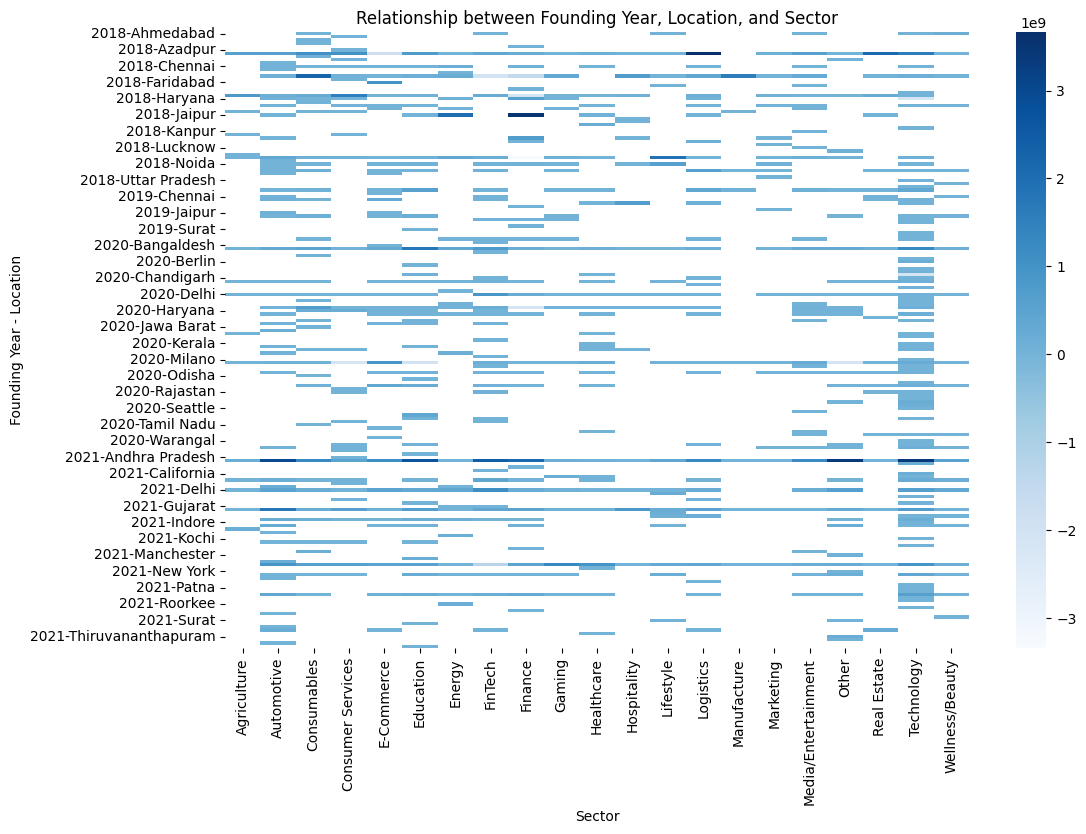

In [434]:

# Create a pivot table with founding year, location, and sector as indices
pivot = idn.pivot_table(values='Amount($)', index=['Year', 'HeadQuarter'], columns='Sector', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap='Blues')
plt.title('Relationship between Founding Year, Location, and Sector')
plt.xlabel('Sector')
plt.ylabel('Founding Year - Location')
plt.show()


 On the above heatmap the color scale indicates the magnitude of the funding amount, with darker shades representing higher values.

Some possible findings from this heatmap are:

    The highest funding amounts are concentrated in a few sectors, such as Technology, Healthcare, and E-commerce, and are mainly located in a few cities like Bangalore, Mumbai, and Delhi.
    Funding amounts are generally increasing over time, with the most recent years (2020-2022) showing the highest levels of funding across most sectors and locations.
    There are some notable regional variations in funding amounts, with certain cities or regions showing higher levels of funding in specific sectors. For example, Delhi and Gurgaon have higher funding amounts in the Real Estate sector, while Bangalore and Mumbai have higher funding amounts in the Technology sector.

# Multivariate analysis 
### To visualize the correlation between funding stage, funding amount, and sector using a scatter plot:

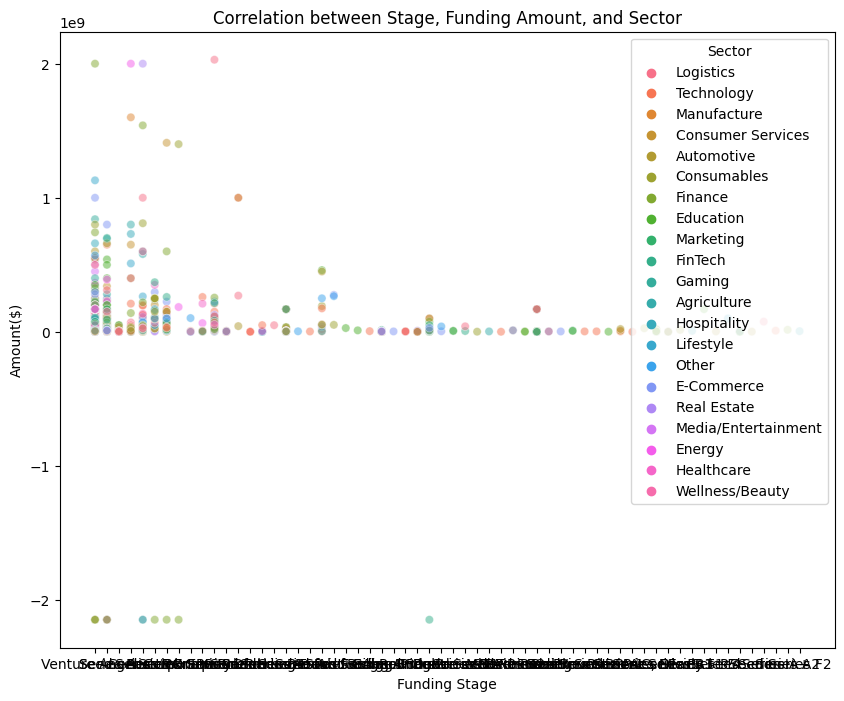

In [435]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=idn, x='Stage', y='Amount($)', hue='Sector', alpha=0.5)
plt.title('Correlation between Stage, Funding Amount, and Sector')
plt.xlabel('Funding Stage')
plt.ylabel('Amount($)')
plt.show()


The scatter plot with funding stage on the x-axis, funding amount on the y-axis, and different sectors represented by different colors. The alpha parameter is set to 0.5 to make the plot points partially transparent.

# ANSWERING QUESTIONS WITH VISUALIZATION

# Analysis and Visualization


## Question 1: Do companies in certain sectors tend to receive more funding than others?
## We will start by analyzing the distribution of funding amounts across different sectors.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2800\1672615682.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10_idn = top_10_idn.groupby('Sector')['Amount($)', 'Company/Brand'].agg({'Amount($)': 'sum', 'Company/Brand': 'count'}).reset_index().sort_values(by='Amount($)', ascending=False)


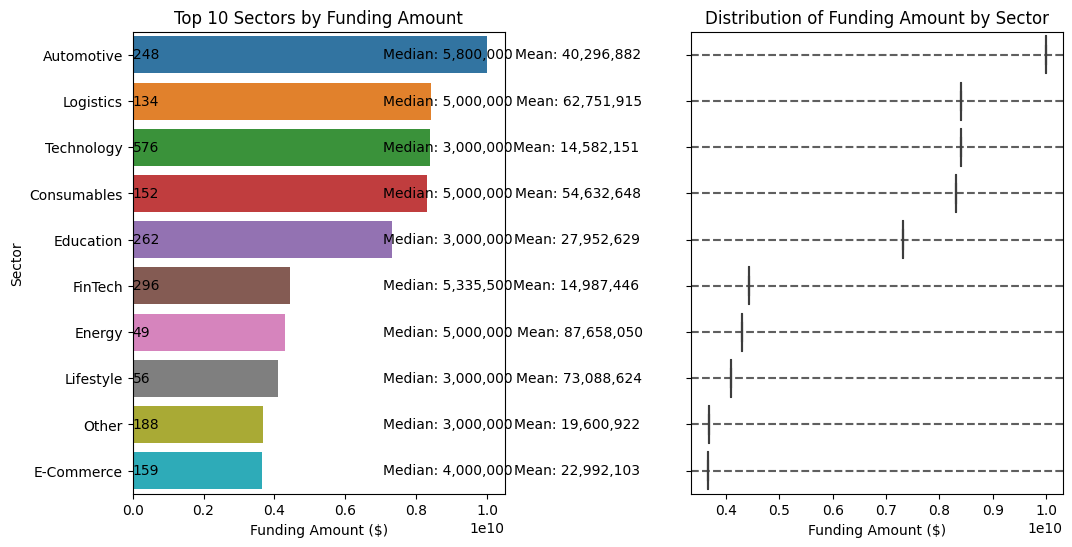

In [436]:
# Get top 10 sectors by funding amount
top_10_sectors = idn.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).head(10).index

top_10_idn = idn[idn['Sector'].isin(top_10_sectors)]

# Sort the top 10 sectors by funding amount in descending order
top_10_idn = top_10_idn.groupby('Sector')['Amount($)', 'Company/Brand'].agg({'Amount($)': 'sum', 'Company/Brand': 'count'}).reset_index().sort_values(by='Amount($)', ascending=False)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

sns.barplot(x='Amount($)', y='Sector', data=top_10_idn, ax=ax1)

ax1.set_title('Top 10 Sectors by Funding Amount')
ax1.set_xlabel('Funding Amount ($)')
ax1.set_ylabel('Sector')

# Add annotations for the number of companies
for i, (value, sector) in enumerate(zip(top_10_idn['Company/Brand'], top_10_idn['Sector'])):
    ax1.text(value, i, f'{value:,}', va='center')

# Create boxplot for funding amount by sector
sns.boxplot(x='Amount($)', y='Sector', data=top_10_idn, ax=ax2)

# Set plot title and axis labels for boxplot
ax2.set_title('Distribution of Funding Amount by Sector')
ax2.set_xlabel('Funding Amount ($)')
ax2.set_ylabel('')

# Add mean and median lines for each sector to boxplot
for i, sector in enumerate(top_10_idn['Sector']):
    sector_data = idn[idn['Sector'] == sector]['Amount($)']
    mean = sector_data.mean()
    median = sector_data.median()
    ax2.axhline(i, linestyle='--', color='gray', alpha=0.5)
    ax2.axhline(i, linestyle='--', color='black', alpha=0.5)
    ax2.text(mean, i, f'Mean: {mean:,.0f}', va='center', ha='left', fontsize=10)
    ax2.text(median, i, f'Median: {median:,.0f}', va='center', ha='right', fontsize=10)

# Add space between subplots and adjust layout
fig.subplots_adjust(wspace=0.5)

# Show plot
plt.show()


### The combined bar and boxplot provides a comprehensive overview of the funding distribution of the top 10 sectors. The bar plot shows the total funding amount for each sector, while the boxplot provides information about the distribution of funding amounts within each sector, including the median, interquartile range, and outliers.

# Question 2: Is there a correlation between the stage of development of a company and the amount of funding it receives?
## We will use a scatter plot to visualize the relationship between the stage and funding amount and calculate the correlation coefficient.

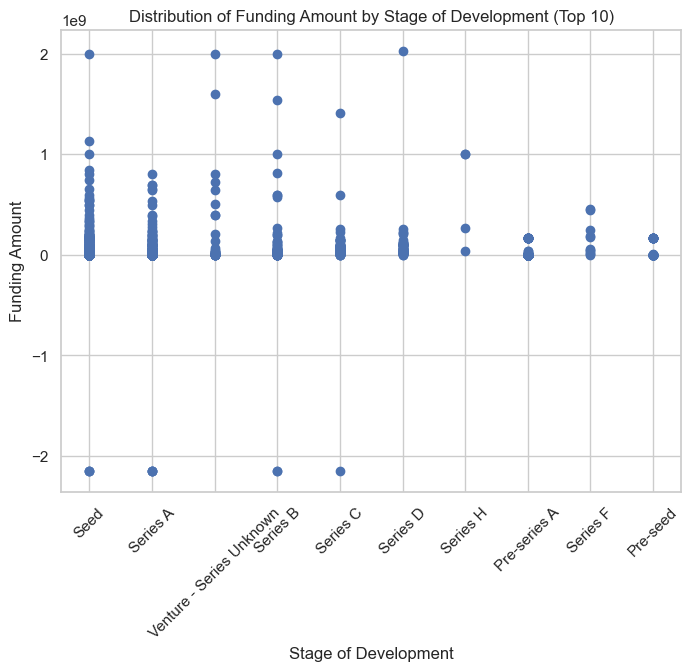

In [437]:
# Rename the 'Amount($)' column to 'Amount'
# idn = idn.rename(columns={'Amount($)': 'Amount'})

# Calculate the total funding amount by stage of development
stage_totals = idn.groupby('Stage')['Amount($)'].sum().reset_index()

# Select the top 10 stages by funding amount
top_stages = stage_totals.sort_values('Amount($)', ascending=False).head(10)['Stage'].tolist()

# Create a new DataFrame that only includes the top 10 stages
idn_top = idn[idn['Stage'].isin(top_stages)]

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x='Stage', y='Amount($)', data=idn_top)
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount')
plt.title('Distribution of Funding Amount by Stage of Development (Top 10)')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=45)

plt.show()

### The scatter plot shows the distribution of funding amount by stage of development for the top 10 stages. It appears that the later stages of development, such as Series D, have the highest funding amounts, while the early stages, such as Seed and Series A, have relatively lower funding amounts. This is consistent with the general trend in the startup industry where companies require more funding as they progress through various stages of development. However, it's worth noting that there are some outliers in each stage, indicating that funding amount is not solely determined by the stage of development.

## Question 3.
## Are companies with more founders more likely to receive larger amounts of funding?

## We're going use the bar chart and different distributive visuals to answer this question.

In [444]:
idn = pd.concat([idn_2019, idn_2020, idn_2021], ignore_index=True)

NameError: name 'idn_2019' is not defined

In [441]:
idn1 = idn1.dropna(subset=['Founders'])

idn1['Founders'] = idn1['Founders'].astype(str)

# Split the founders column into a list of founders
idn1['Founders'] = idn1['Founders'].str.split(',')

# Create a new column for the number of founders
idn1['NumFounders'] = idn1['Founders'].apply(lambda x: len(x))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart - Top left
grouped = idn1.groupby('NumFounders')['Amount($)'].mean()
axs[0, 0].bar(grouped.index, grouped.values)
axs[0, 0].set_xlabel('Number of Founders')
axs[0, 0].set_ylabel('Average Funding Amount')
axs[0, 0].set_title('Average Funding Amount by Number of Founders')

grouped = idn1.groupby('NumFounders')['Amount($)'].apply(list)
axs[0, 1].boxplot(grouped.values, labels=grouped.index)
axs[0, 1].set_title('Distribution of Funding Amounts by Number of Founders')
axs[0, 1].set_xlabel('Number of Founders')
axs[0, 1].set_ylabel('Funding Amount')

sns.violinplot(x='NumFounders', y='Amount($)', data=idn1, ax=axs[1, 0])
axs[1, 0].set_xlabel('Number of Founders')
axs[1, 0].set_ylabel('Funding Amount')
axs[1, 0].set_title('Distribution of Funding Amount by Number of Founders')

# Remove empty subplot - Bottom right
fig.delaxes(axs[1, 1])

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()


NameError: name 'idn1' is not defined

 From the bar chart, we can see that the average funding amount generally increases as the number of founders increases in most cases, with the 8th number of founders having the highest average funding amount. This suggests a positive relationship between the number of founders and funding amounts.
 
However, the box plot provides additional information about the distribution of funding amounts for each number of founders.The box plot for the 8th number of founders does not have a long tail on the top and bottom (indicating a narrow distribution), it suggests that the funding amounts for companies with 8 founders tend to be more concentrated around the median, with fewer extreme values.  On the other hand,the box plot for 1 number of founders has the longest tail, it indicates a wider distribution of funding amounts for companies with only 1 founder.

A weak negative correlation between the number of founders and funding amounts, it indicates that there is a tendency for companies with more founders to receive slightly lower funding amounts on average. This finding contrasts with the observation from the bar chart, where the average funding amount increased as the number of founders increased.

## Question 4
## Are there any patterns in the location of a company's headquarters and the amount of funding it receives?

## The Quest will be use some form of bar chart to compare the average funding with respect to location.

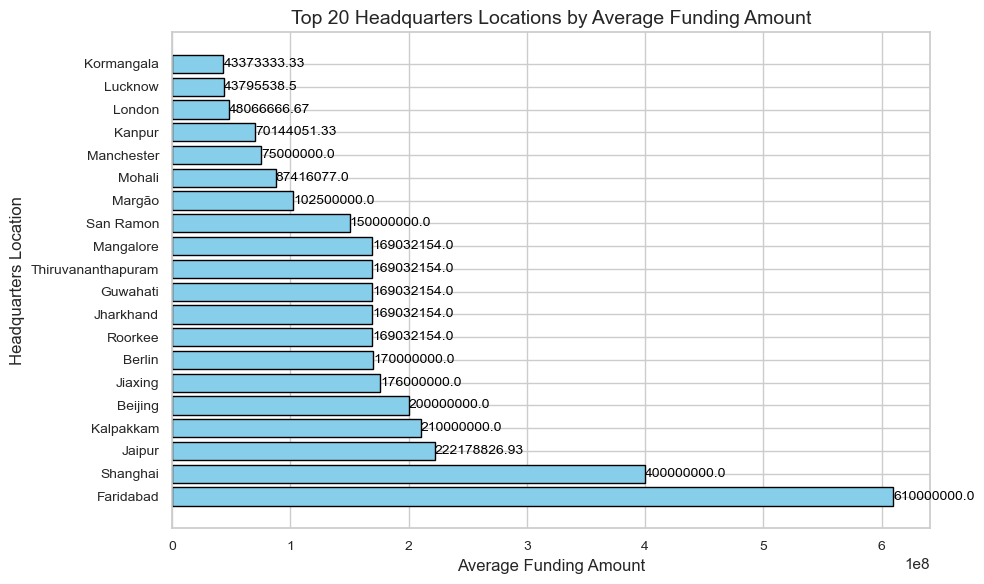

In [ ]:
grouped = idn.groupby('HeadQuarter')['Amount($)'].mean()

grouped = grouped.sort_values(ascending=False)

top_20 = grouped[:20]

# Create a horizontal bar chart to visualize the relationship between headquarters location and funding amounts
fig, ax = plt.subplots(figsize=(10, 6))  
# Customize the bar chart aesthetics
ax.barh(top_20.index, top_20.values, color='skyblue', edgecolor='black')  
ax.set_xlabel('Average Funding Amount', fontsize=12)
ax.set_ylabel('Headquarters Location', fontsize=12)  
ax.set_title('Top 20 Headquarters Locations by Average Funding Amount', fontsize=14) 

# Adjust the tick labels font size
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add data labels to the bars
for i, v in enumerate(top_20.values):
    ax.text(v + 0.5, i, str(round(v, 2)), color='black', fontsize=10, va='center')  # Adjust the label position and font size

plt.tight_layout() 
plt.show()


The Chart shows a significant difference in the funding received by locations. We can estimate that startups in the city of Faridabad received the most funds per the averages accumalated. 610 million was what the startups in the city were averaging. The nearest city to them which was Shanghai trailed by over 210 million. 

We can approximate that the related sector of the startups in this city could be a factor. 

## Further analysis of the data

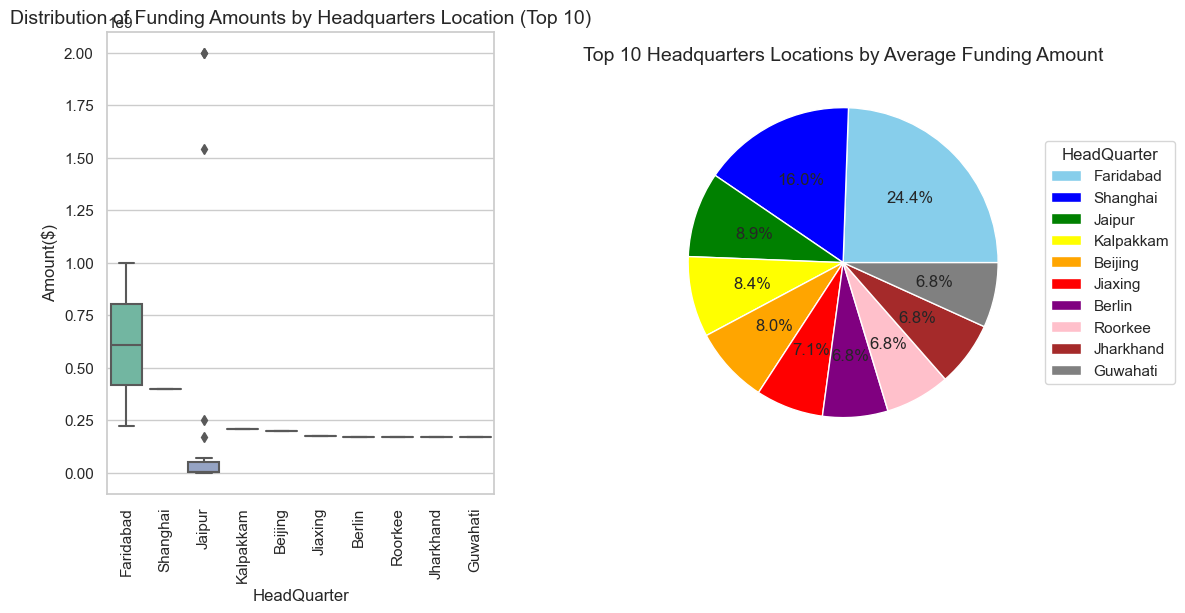

In [ ]:
# Data for the box plot
grouped = idn.groupby('HeadQuarter')['Amount($)'].mean()
grouped = grouped.sort_values(ascending=False)
top_10 = grouped[:10]

# Data for the pie chart
labels = top_10.index
values = top_10.values

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create the box plot on the left subplot
axes[0].set_title('Distribution of Funding Amounts by Headquarters Location (Top 10)', fontsize=14)
axes[0].set_xlabel('HeadQuarter', fontsize=12)
axes[0].set_ylabel('Amount($)', fontsize=12)
sns.boxplot(x='HeadQuarter', y='Amount($)', data=idn, order=top_10.index, palette='Set2', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees

# Create the pie chart on the right subplot
axes[1].set_title('Top 10 Headquarters Locations by Average Funding Amount', fontsize=14)
pie = axes[1].pie(values, labels=None, autopct='%1.1f%%', colors=['skyblue', 'blue', 'green', 'yellow', 'orange', 'red', 'purple', 'pink', 'brown', 'gray'])
axes[1].legend(pie[0], labels, title='HeadQuarter', bbox_to_anchor=(1, 0.5), loc='center left')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


## The visuals above shows a consistent trend in the distribution and volume of the funding by the location. The city of Faridabad not only have the highest average by funding but the distribution in funding dispersion is also wide. In some instances a sysmetric movement we mean high volumn but not in this case 

## Question 5. 

## Does the number of investors in a company tend to impact the amount of funding it receives?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


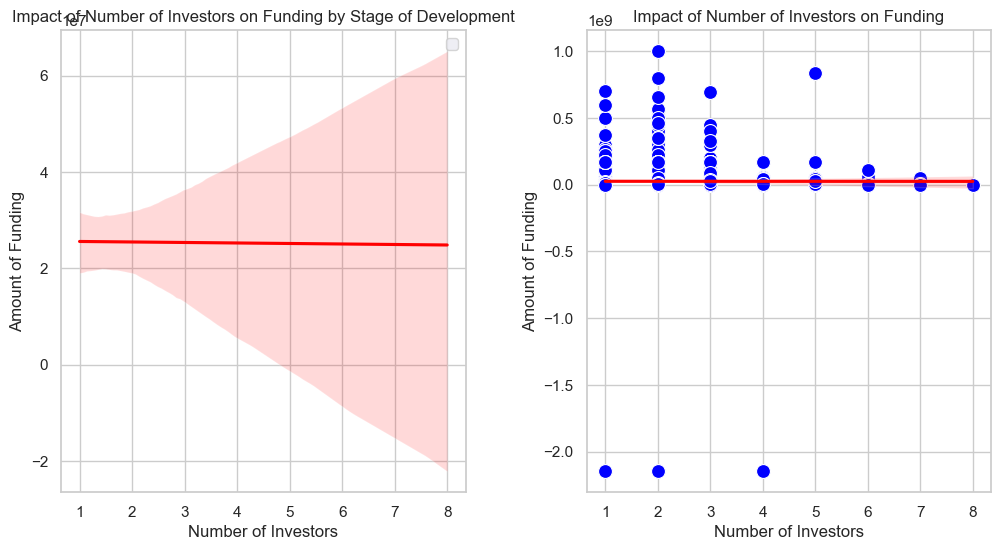

In [ ]:
# Calculate total number of investors for each row
idn1['total_investors'] = idn1['Investor'].apply(lambda x: len(str(x).split(',')))

# Assign variables for scatter plot
number_of_investors = idn1['total_investors']
amount_of_funding = idn1['Amount($)']
stage_of_development = idn1['Stage']

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot scatter plot on the left
sns.set_style("darkgrid")
stage_colors = {'Early Stage': 'blue', 'Growth Stage': 'green', 'Mature Stage': 'orange'}
for stage in stage_colors:
    stage_indices = idn1[idn1['Stage'] == stage].index
    sns.scatterplot(x=number_of_investors[stage_indices], y=amount_of_funding[stage_indices],
                    s=100, color=stage_colors[stage], label=stage, ax=ax1)
sns.regplot(x=number_of_investors, y=amount_of_funding, scatter=False, color='red', ax=ax1)
ax1.set_xlabel('Number of Investors')
ax1.set_ylabel('Amount of Funding')
ax1.set_title('Impact of Number of Investors on Funding by Stage of Development')
ax1.legend()

# Plot scatter plot on the right
sns.set_style("darkgrid")
sns.scatterplot(x=number_of_investors, y=amount_of_funding, s=100, color='blue', ax=ax2)
sns.regplot(x=number_of_investors, y=amount_of_funding, scatter=False, color='red', ax=ax2)
ax2.set_xlabel('Number of Investors')
ax2.set_ylabel('Amount of Funding')
ax2.set_title('Impact of Number of Investors on Funding')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()


The horizontal trend observed in the scatter plot aligns with the weak correlation coefficient and supports the conclusion that there is no significant correlation. The data points scattered without a clear pattern further reinforce the lack of a strong relationship between the number of investors and the amount of funding. 

The distribution looks symetric on the 8 tally of investors it might suggest grand some of investment but the distribution is lean. 

There is another visuals showing the distribution and relationship between the stage of development of the business in relation to the amount and investors. It shows the same horizontal trend observed in the other plot and further reinforces the conclusion that the number of investors does not necessarily impact the funding amount. If there was a strong relationship, we would expect to see a clearer pattern or trend across different visualizations.

In summary, based on the scatter plot, weak correlation coefficient, lack of clear pattern, and consistency across different visuals, it can be concluded that the number of investors does not have a significant impact on the amount of funding. Other factors or variables may be more influential in determining funding amounts in this particular context.

## Further Analysis

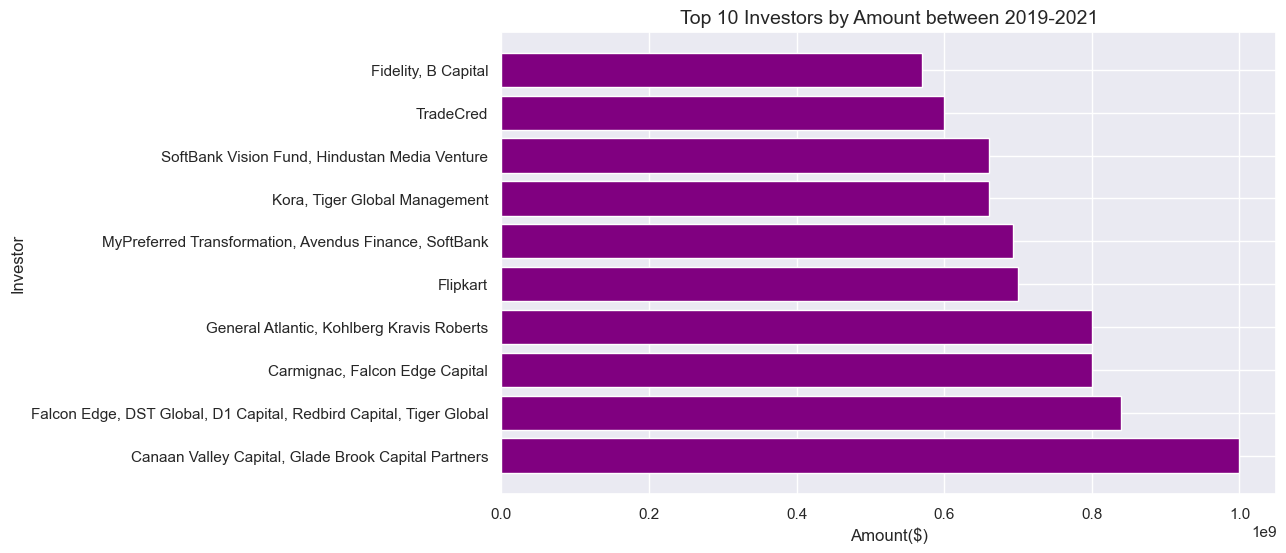

In [ ]:
# sort the dataframe by amount in descending order and select the top 10 investors
top_investors = idn1.sort_values(by='Amount($)', ascending=False).head(10)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_investors['Investor'], top_investors['Amount($)'], color='purple')

ax.set_xlabel('Amount($)', fontsize=12)

ax.set_ylabel('Investor', fontsize=12)

ax.set_title('Top 10 Investors by Amount between 2019-2021', fontsize=14)

plt.show()

## The bar chart further buttresses the finding of the visuals above and the hypothesis testing. The number of investors was not significant in the distribution and volume of the  funding amount. Although the highest investor by funding was from a combination of 3 investors and 4 investors but then again there were more occurences of a single investor and a lower count of investors in many instances. 

## Some more Analysis 

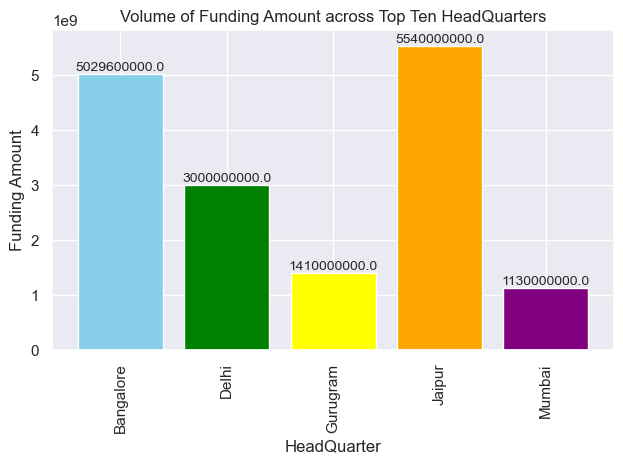

In [ ]:
# Sort the DataFrame by the amount in descending order and select the top ten HeadQuarters
top_headquarters = idn.sort_values(by='Amount($)', ascending=False).head(10)

# Group the data by HeadQuarter and calculate the total funding amount for each HeadQuarter
hq_totals = top_headquarters.groupby('HeadQuarter')['Amount($)'].sum()

# Create a list of colors for the bars
colors = ['skyblue', 'green','yellow','orange', 'purple', 'pink', 'brown', 'gray']

# Create a stacked bar chart
# plt.figure(figsize=(10, 6))
plt.bar(hq_totals.index, hq_totals, color=colors)

# Customize the chart
plt.xlabel('HeadQuarter')
plt.ylabel('Funding Amount')
plt.title('Volume of Funding Amount across Top Ten HeadQuarters')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Add data labels to the bars
for i, v in enumerate(hq_totals):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


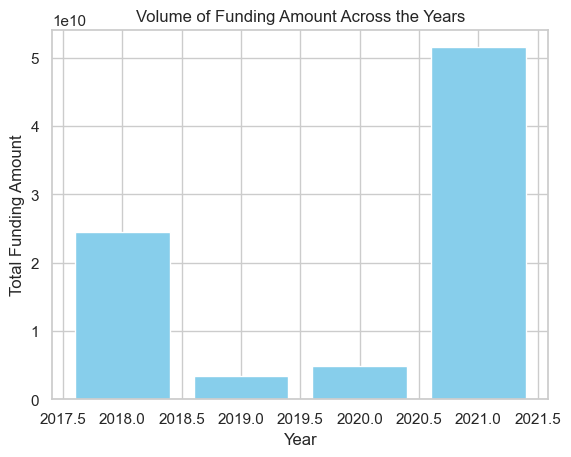

In [ ]:
# Group the data by year and calculate the total funding amount for each year
yearly_totals = idn.groupby('Year')['Amount($)'].sum()

# Set the plot style
sns.set(style='whitegrid')

# Create the stacked bar chart
# plt.figure(figsize=(10, 6))
plt.bar(yearly_totals.index, yearly_totals.values, color='skyblue')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.title('Volume of Funding Amount Across the Years')

plt.show()

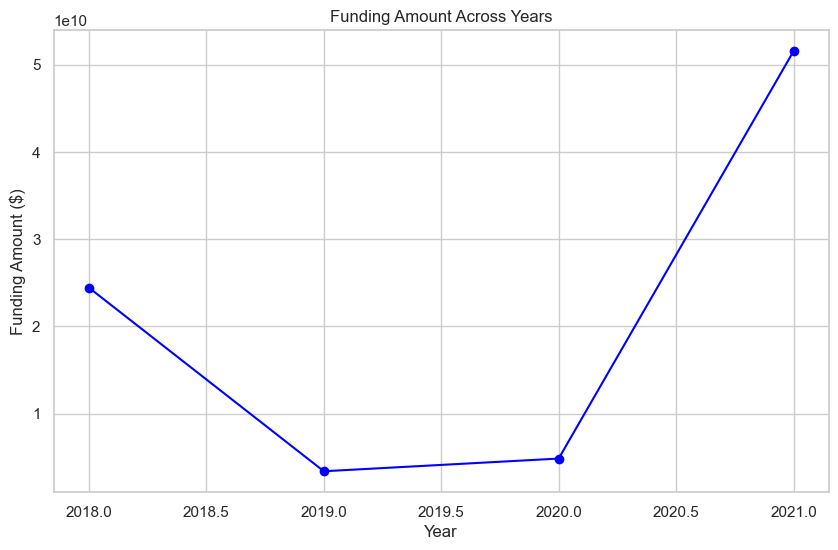

In [ ]:
# Group the data by year and calculate the total funding amount for each year
yearly_totals = idn.groupby('Year')['Amount($)'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals.index, yearly_totals.values, marker='o', linestyle='-', color='blue')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Funding Amount ($)')
plt.title('Funding Amount Across Years')

# Display the plot
plt.show()

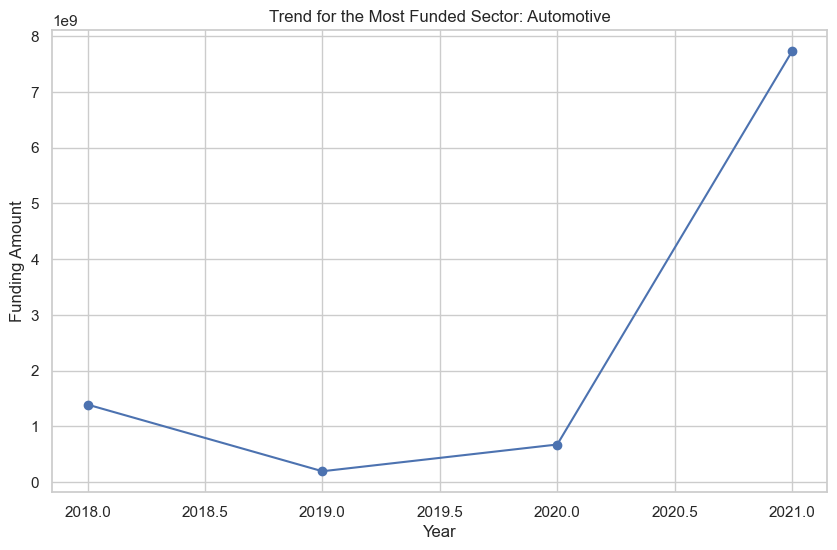

In [ ]:
import matplotlib.pyplot as plt

# Group the data by Year and Sector and calculate the total funding amount
sector_totals = idn.groupby(['Year', 'Sector'])['Amount($)'].sum().reset_index()

# Find the sector with the highest total funding amount across the years
top_sector = sector_totals.groupby('Sector')['Amount($)'].sum().idxmax()

# Filter the data for the top sector
top_sector_data = sector_totals[sector_totals['Sector'] == top_sector]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(top_sector_data['Year'], top_sector_data['Amount($)'], marker='o')

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Funding Amount')
plt.title(f'Trend for the Most Funded Sector: {top_sector}')

# Display the plot
plt.show()


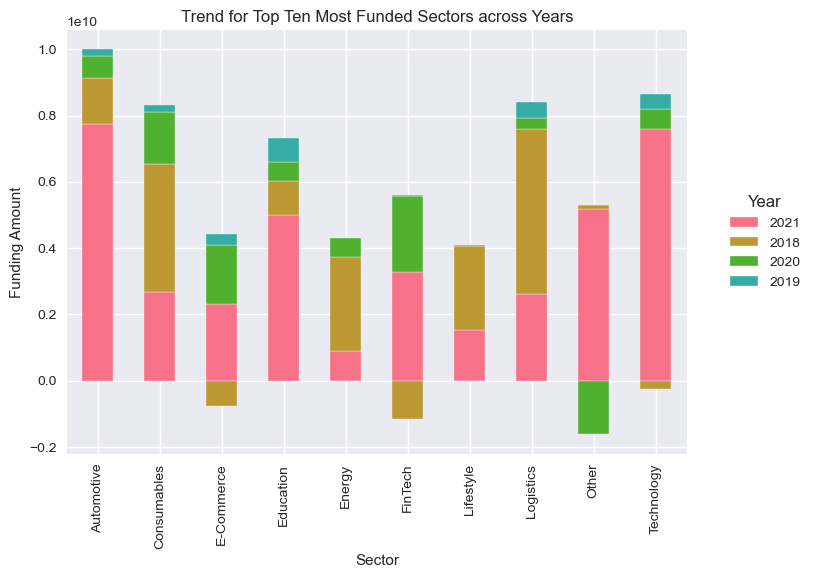

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by the total funding amount for each sector in descending order
top_sectors = idn.groupby('Sector')['Amount($)'].sum().nlargest(10).index

# Filter the DataFrame to include only the top ten sectors
idn_top = idn[idn['Sector'].isin(top_sectors)]

# Pivot the DataFrame to have 'Year' as columns, 'Sector' as index, and 'Amount($)' as values
pivot_idn = idn_top.pivot_table(index='Sector', columns='Year', values='Amount($)', aggfunc='sum')

# Sort the columns of the pivoted DataFrame in descending order based on the total funding amount
pivot_idn = pivot_idn[pivot_idn.sum().sort_values(ascending=False).index]

# Set the plot style
sns.set_palette("husl")

# Create the stacked bar chart
ax = pivot_idn.plot(kind='bar', stacked=True)
#                    figsize=(10, 6))

# Set the axis labels and title
ax.set_xlabel('Sector')
ax.set_ylabel('Funding Amount')
ax.set_title('Trend for Top Ten Most Funded Sectors across Years')

# Move the legend to the right side
ax.legend(title='Year', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Display the chart
plt.show()


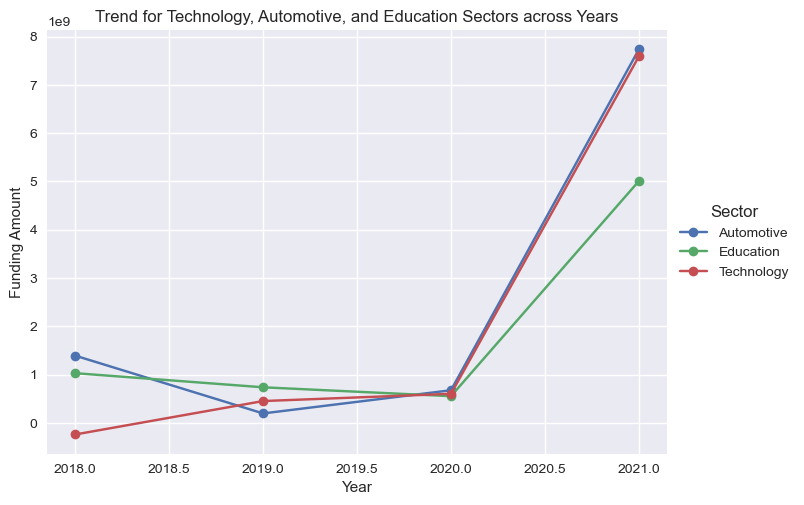

In [ ]:
import matplotlib.pyplot as plt

# Select the sectors of interest
sectors = ['Technology', 'Automotive', 'Education']

# Filter the DataFrame to include only the selected sectors
idn_selected = idn[idn['Sector'].isin(sectors)]

# Pivot the DataFrame to have 'Year' as columns and 'Sector' as index
pivot_idn = idn_selected.pivot_table(index='Sector', columns='Year', values='Amount($)', aggfunc='sum')

# Set the plot style
plt.style.use('seaborn')

# Create the line plot
ax = pivot_idn.T.plot(marker='o')
# figsize=(10, 6))

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Funding Amount')
ax.set_title('Trend for Technology, Automotive, and Education Sectors across Years')

# Set the legend
# ax.legend(title='Sector')

# Move the legend to the right side
ax.legend(title='Sector', bbox_to_anchor=(1, 0.5), loc='center left')


# Display the chart
plt.show()


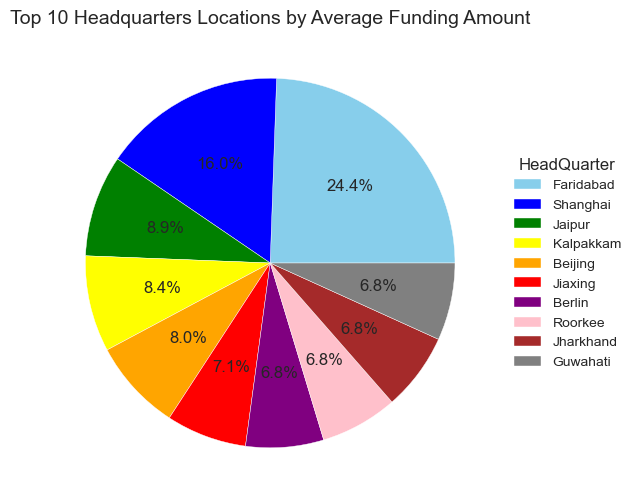

In [ ]:
grouped = idn.groupby('HeadQuarter')['Amount($)'].mean()
grouped = grouped.sort_values(ascending=False)
top_10 = grouped[:10]

# Create a pie chart to visualize the relationship between headquarters location and average funding amount
fig, ax = plt.subplots(figsize=(10, 6))
pie = ax.pie(top_10.values, labels=None, autopct='%1.1f%%', colors=['skyblue', 'blue', 'green', 'yellow', 'orange', 'red', 'purple', 'pink', 'brown', 'gray'])

ax.set_title('Top 10 Headquarters Locations by Average Funding Amount', fontsize=14)

# Add a legend on the side
ax.legend(pie[0], top_10.index, title='HeadQuarter', bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

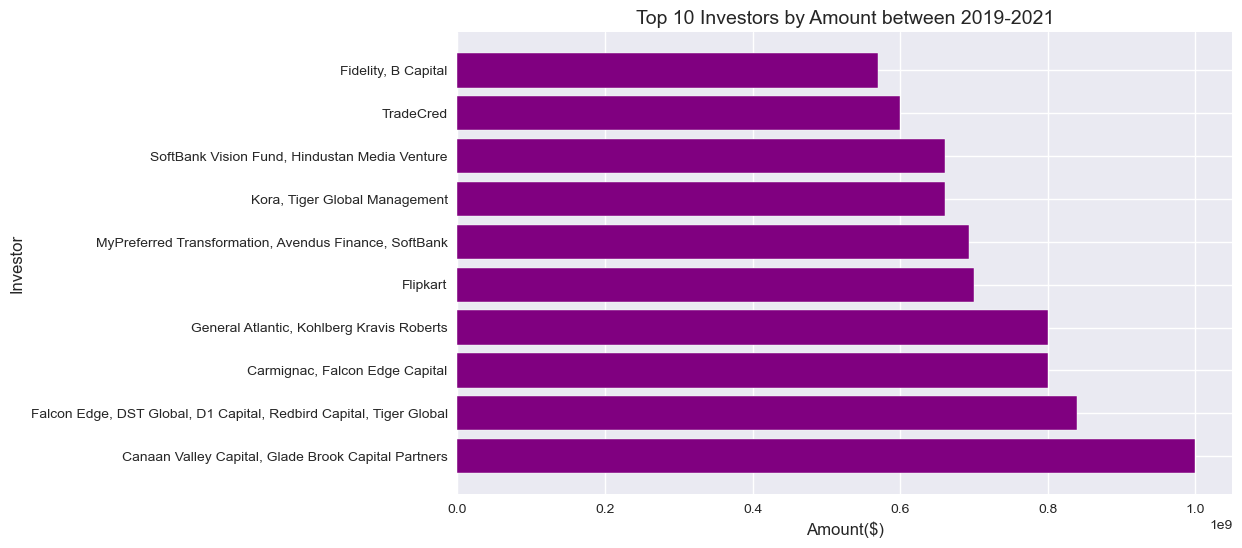

In [ ]:
# sort the dataframe by amount in descending order and select the top 10 investors
top_investors = idn1.sort_values(by='Amount($)', ascending=False).head(10)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_investors['Investor'], top_investors['Amount($)'], color='purple')

ax.set_xlabel('Amount($)', fontsize=12)

ax.set_ylabel('Investor', fontsize=12)

ax.set_title('Top 10 Investors by Amount between 2019-2021', fontsize=14)

plt.show()

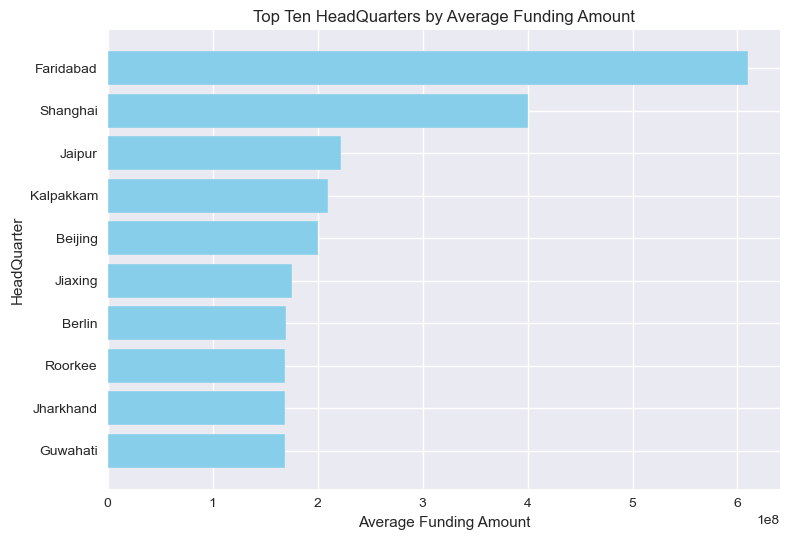

In [ ]:
# Group the data by HeadQuarter and calculate the average funding amount for each HeadQuarter
hq_avg_amount = idn.groupby('HeadQuarter')['Amount($)'].mean()

# Sort the average funding amounts in descending order and select the top ten HeadQuarters
top_10_hq = hq_avg_amount.sort_values(ascending=False).head(10)

# Create a horizontal bar chart
# plt.figure(figsize=(10, 6))
plt.barh(top_10_hq.index, top_10_hq.values, color='skyblue')

# Customize the chart
plt.xlabel('Average Funding Amount')
plt.ylabel('HeadQuarter')
plt.title('Top Ten HeadQuarters by Average Funding Amount')
plt.gca().invert_yaxis()  # Invert the y-axis to display HeadQuarters from top to bottom

Add data labels to the bars
for i, v in enumerate(top_10_hq.values):
    plt.text(v, i, f'{v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


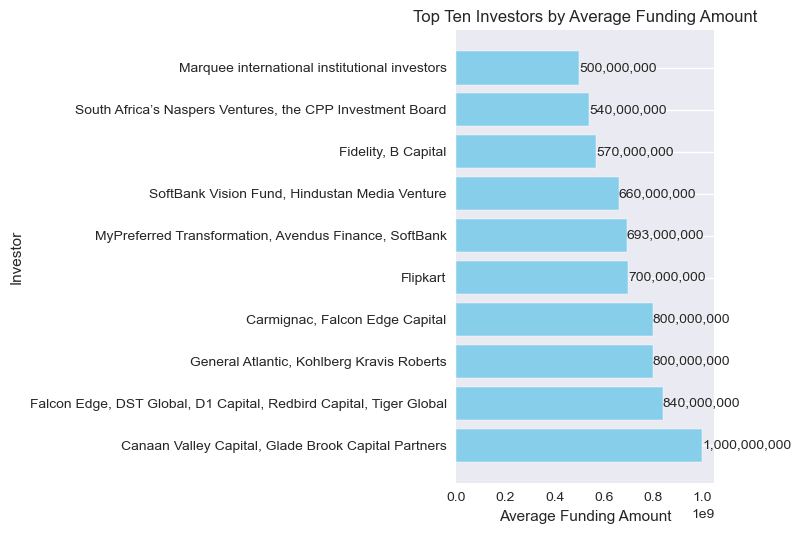

In [ ]:
# Group the data by investor and calculate the average funding amount for each investor
investor_avg_amount = idn.groupby('Investor')['Amount($)'].mean()

# Sort the investor average amounts in descending order and select the top ten investors
top_10_investors = investor_avg_amount.sort_values(ascending=False).head(10)

# Create a horizontal bar chart to visualize the top ten investors
# plt.figure(figsize=(10, 6))
plt.barh(top_10_investors.index, top_10_investors.values, color='skyblue')

# Customize the chart
plt.xlabel('Average Funding Amount')
plt.ylabel('Investor')
plt.title('Top Ten Investors by Average Funding Amount')
plt.grid(axis='x')  # Add gridlines for better readability

# Add data labels to the bars
for i, v in enumerate(top_10_investors.values):
    plt.text(v, i, f'{v:,.0f}', va='center', fontsize=10)


plt.tight_layout()
plt.show()


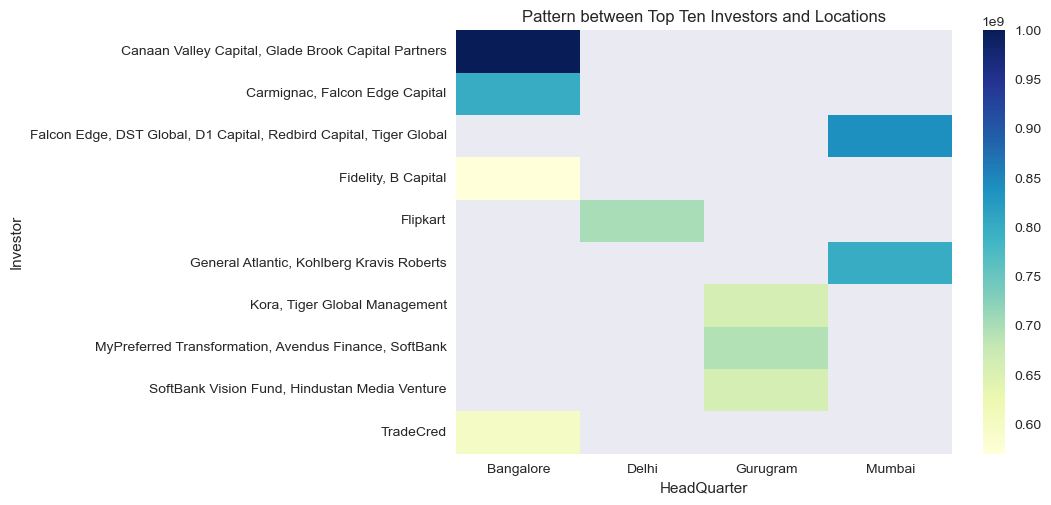

In [ ]:
import seaborn as sns

# Sort the dataframe by amount in descending order and select the top 10 investors
top_investors = idn1.sort_values(by='Amount($)', ascending=False).head(10)

# Pivot the data to create a matrix of investors and locations
heatmap_data = top_investors.pivot(index='Investor', columns='HeadQuarter', values='Amount($)')

# Create a heatmap
# plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')

# Customize the chart
plt.xlabel('HeadQuarter')
plt.ylabel('Investor')
plt.title('Pattern between Top Ten Investors and Locations')

plt.show()

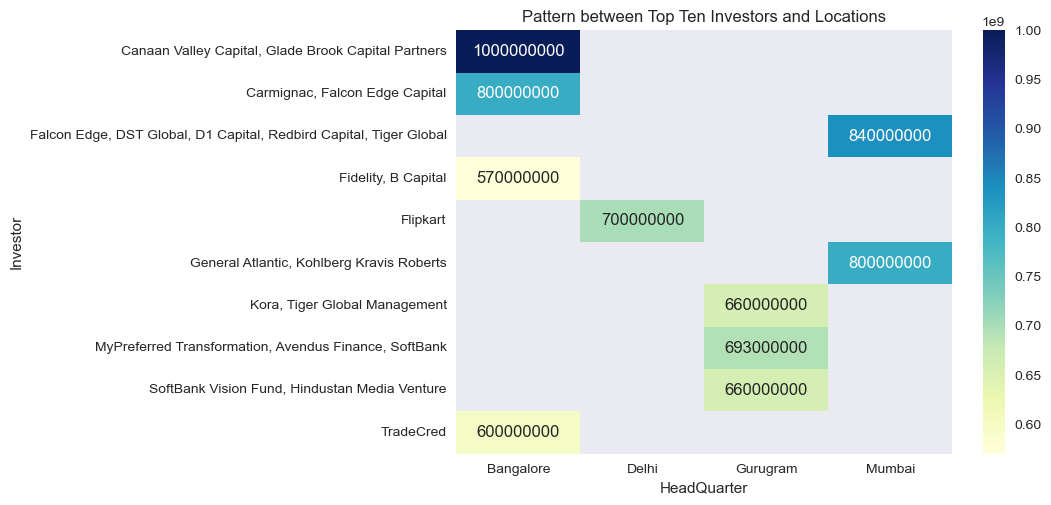

In [ ]:
import seaborn as sns

# Sort the dataframe by amount in descending order and select the top 10 investors
top_investors = idn1.sort_values(by='Amount($)', ascending=False).head(10)

# Create a pivot table to aggregate the funding amounts by investor and location
heatmap_data = top_investors.pivot_table(values='Amount($)', index='Investor', columns='HeadQuarter', aggfunc='sum')

# Create a heatmap
# plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', cbar=True)

# Customize the chart
plt.xlabel('HeadQuarter')
plt.ylabel('Investor')
plt.title('Pattern between Top Ten Investors and Locations')

plt.show()


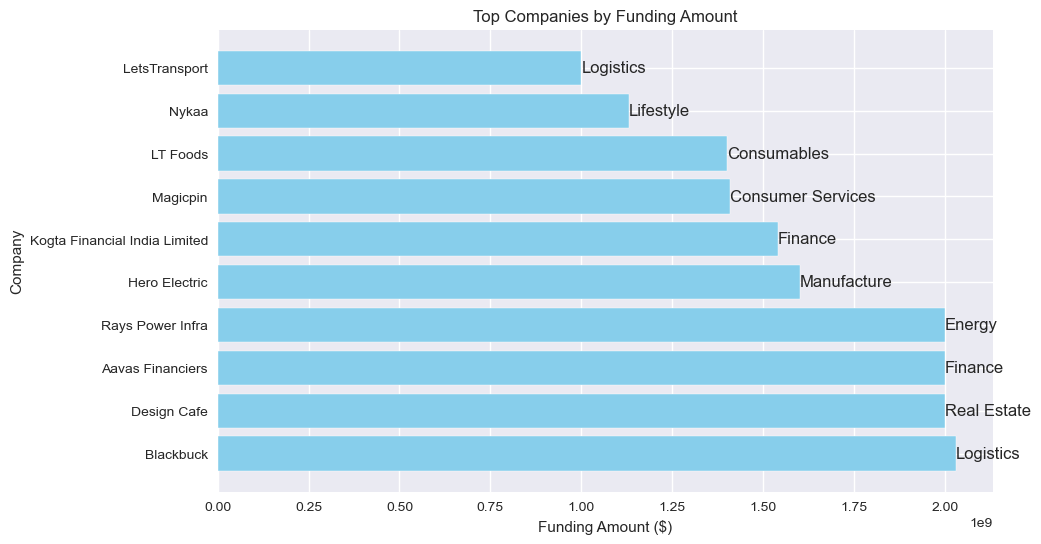

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the funding amount in descending order
top_companies = idn.sort_values(by='Amount($)', ascending=False).head(10)

# Extract the company names and their respective sectors
companies = top_companies['Company/Brand']
sectors = top_companies['Sector']

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(companies, top_companies['Amount($)'], color='skyblue')

ax.set_xlabel('Funding Amount ($)')
ax.set_ylabel('Company')
ax.set_title('Top Companies by Funding Amount')

# Add labels for the sectors
for i, company in enumerate(companies):
    sector = sectors.iloc[i]
    ax.text(top_companies['Amount($)'].iloc[i] + 100000, i, sector, ha='left', va='center')

plt.show()


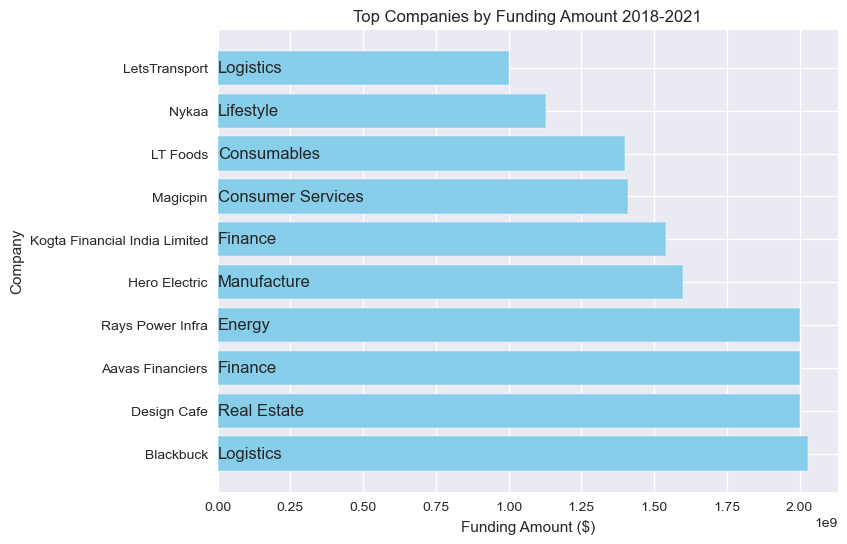

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the funding amount in descending order
top_companies = idn.sort_values(by='Amount($)', ascending=False).head(10)

# Extract the company names, sectors, and funding amounts
companies = top_companies['Company/Brand']
sectors = top_companies['Sector']
amounts = top_companies['Amount($)']

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(companies, amounts, color='skyblue')

ax.set_xlabel('Funding Amount ($)')
ax.set_ylabel('Company')
ax.set_title('Top Companies by Funding Amount 2018-2021')

# # Add labels for the sectors and funding amounts
for i, company in enumerate(companies):
    sector = sectors.iloc[i]
#     amount = amounts.iloc[i]
#     ax.text(amount + 100000, i, f'{amount:,.0f}', ha='left', va='center')
    ax.text(0.01, i, sector, ha='left', va='center')

plt.show()

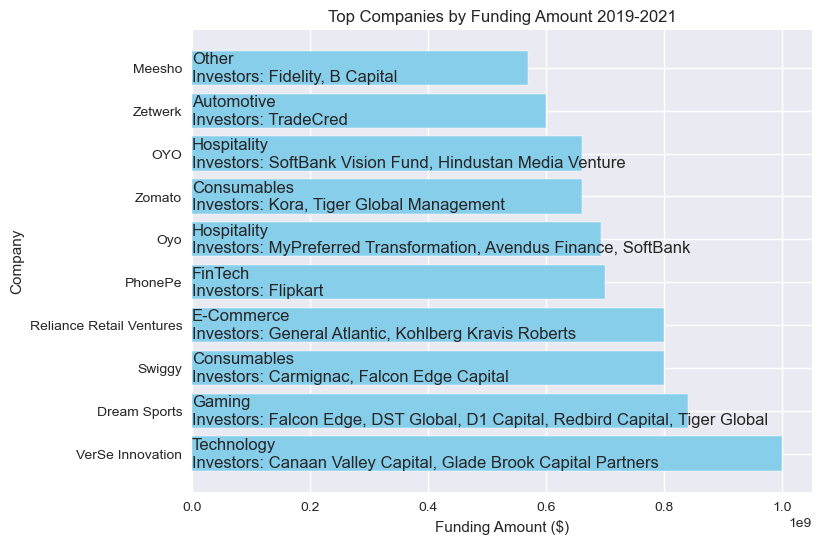

In [ ]:

# Sort the DataFrame by the funding amount in descending order
top_companies = idn1.sort_values(by='Amount($)', ascending=False).head(10)

# Extract the company names, sectors, funding amounts, and investors
companies = top_companies['Company/Brand']
sectors = top_companies['Sector']
amounts = top_companies['Amount($)']
investors = top_companies['Investor']

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(companies, amounts, color='skyblue')

ax.set_xlabel('Funding Amount ($)')
ax.set_ylabel('Company')
ax.set_title('Top Companies by Funding Amount 2019-2021')

# # Add labels for the sectors, funding amounts, and investors
for i, company in enumerate(companies):
    sector = sectors.iloc[i]
#     amount = amounts.iloc[i]
    investor = investors.iloc[i]
#     ax.text(amount + 100000, i, f'{amount:,.0f}', ha='left', va='center')
    ax.text(0.01, i, f'{sector}\nInvestors: {investor}', ha='left', va='center')

plt.show()


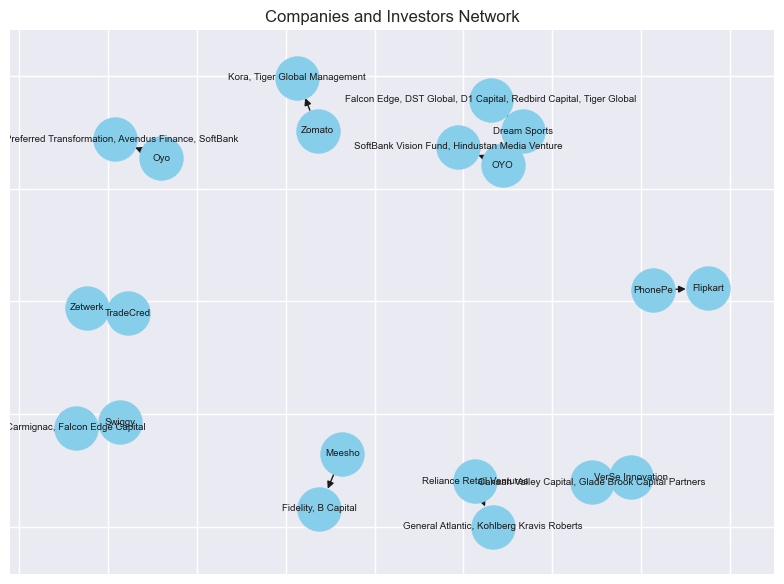

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges between companies and investors
for i, company in enumerate(companies):
    investor = investors.iloc[i]
    G.add_edge(company, investor)

# Set node positions for better visualization
pos = nx.spring_layout(G)

# Create the network graph
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=7)

# Set title
plt.title('Companies and Investors Network')

# Adjust layout
plt.tight_layout()

# Show the graph
plt.show()


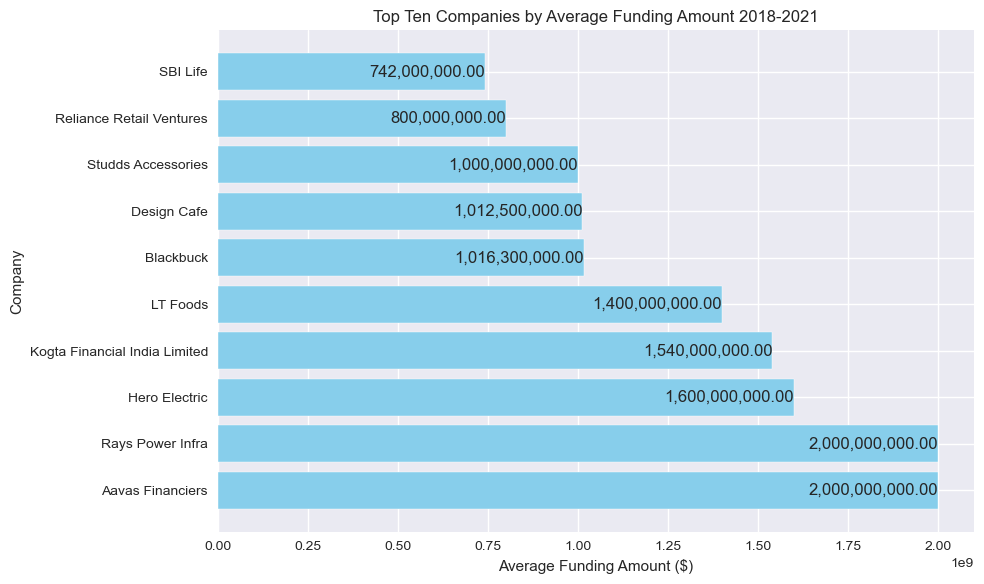

In [ ]:
# Sort the DataFrame by the average funding amount in descending order
top_companies = idn.groupby('Company/Brand')['Amount($)'].mean().nlargest(10)

# Extract the company names and average funding amounts
companies = top_companies.index
average_funding = top_companies.values

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(companies, average_funding, color='skyblue')

# Set labels and title
plt.xlabel('Average Funding Amount ($)')
plt.ylabel('Company')
plt.title('Top Ten Companies by Average Funding Amount 2018-2021')

# Add data labels to the bars
for i, v in enumerate(average_funding):
    plt.text(v, i, f'{v:,.2f}', ha='right', va='center')

# Adjust layout
plt.tight_layout()

# Show the chart
plt.show()


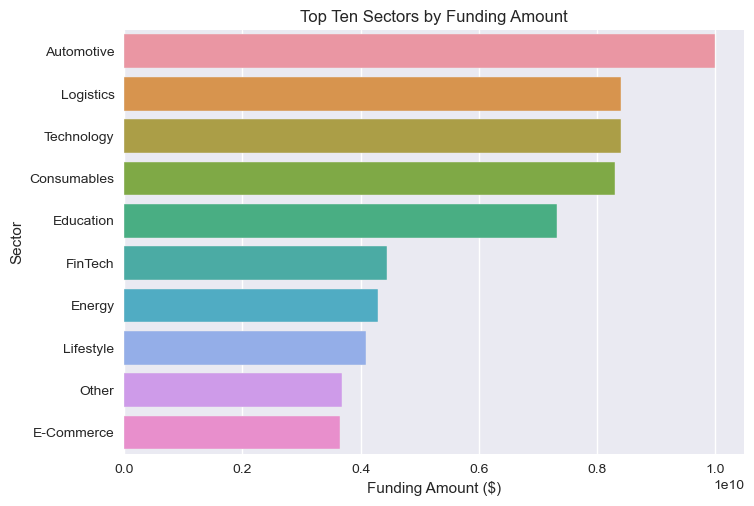

In [ ]:
import numpy as np

# Sort the sectors by funding amount in descending order
sector_order = idn.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).index

# Filter the DataFrame to include only the top ten sectors
top_ten_sectors = sector_order[:10]
idn_top_ten = idn[idn['Sector'].isin(top_ten_sectors)]

# Plot the funding amounts by sector in descending order
sns.barplot(data=idn_top_ten, y='Sector', x='Amount($)', estimator=np.sum, ci=None, order=top_ten_sectors)
plt.title('Top Ten Sectors by Funding Amount')
plt.xlabel('Funding Amount ($)')
plt.ylabel('Sector')
plt.show()


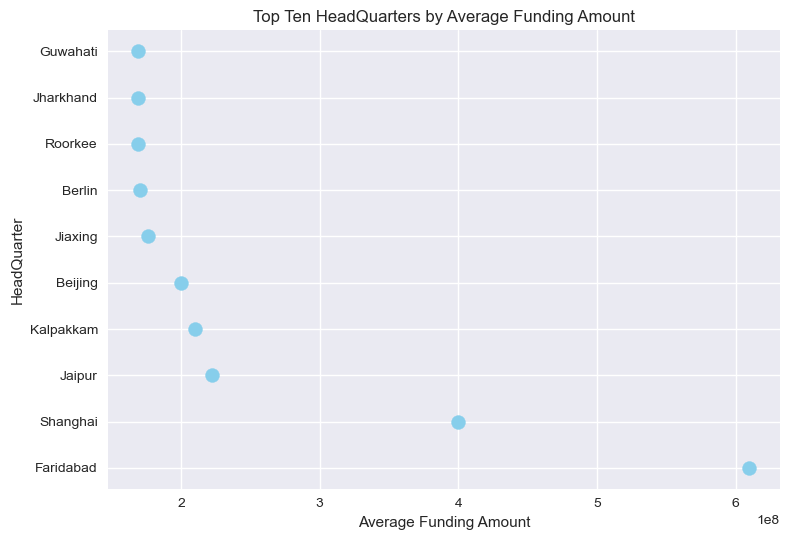

In [ ]:
# Group the data by HeadQuarter and calculate the average funding amount for each HeadQuarter
hq_avg_amount = idn.groupby('HeadQuarter')['Amount($)'].mean()

# Sort the average funding amounts in descending order and select the top ten HeadQuarters
top_10_hq = hq_avg_amount.sort_values(ascending=False).head(10)

# Set the plot style to "seaborn"
plt.style.use('seaborn')

# Create a scatter plot
plt.scatter(top_10_hq.values, top_10_hq.index, color='skyblue', s=100)

# Customize the plot
plt.xlabel('Average Funding Amount')
plt.ylabel('HeadQuarter')
plt.title('Top Ten HeadQuarters by Average Funding Amount')

# # Add data labels to the points
# for i, (amount, hq) in enumerate(zip(top_10_hq.values, top_10_hq.index)):
#     plt.text(amount, hq, f'{amount:.2f}', ha='right', va='center')

plt.tight_layout()
plt.show()


# HYPOTHESIS TESTING

# Hypothesis 3.
## Companies with a larger number of founders are more likely to receive higher amounts of funding in India.

In [ ]:
# create a new column 'total_founders' with the total number of founders for each row
df['total_founders'] = df['Founders'].apply(lambda x: len(str(x).split(',')))

In [ ]:
# Compute the Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(df['total_founders'], df['Amount($)'])

In [ ]:
# # Interpret the results
if p_value < 0.05:
    correlation_strength = 'strong'
else:
    correlation_strength = 'weak'

if corr > 0:
    correlation_direction = 'positive'
else:
    correlation_direction = 'negative'

In [ ]:
# Print the results
print(f"The Pearson correlation coefficient is {corr:.2f}, indicating a {correlation_strength} {correlation_direction} correlation.")
print(f"The p-value is {p_value:.2f}.")

The Pearson correlation coefficient is -0.02, indicating a weak negative correlation.
The p-value is 0.27.


The coefficient value of -0.02 indicates a weak negative correlation. This means that there is a very slight tendency for the funding amount to decrease slightly as the number of founders increases
The p-value is used to determine the statistical significance of the correlation coefficient. In this case, the p-value of 0.26 suggests that there is no strong evidence to reject the null hypothesis. A p-value greater than the significance level (usually 0.05) indicates that the observed correlation could be due to random chance. 

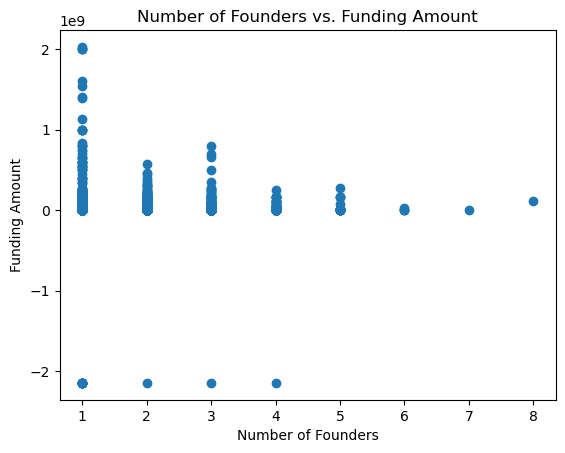

In [ ]:
# Scatter plot
plt.scatter(df['total_founders'], df['Amount($)'])

# Set labels and title
plt.xlabel('Number of Founders')
plt.ylabel('Funding Amount')
plt.title('Number of Founders vs. Funding Amount')

# Display the plot
plt.show()

# Hypothesis 4.
## Startups headquartered in major metropolitan areas such as Mumbai, Bangalore, and Delhi are more likely to receive larger amounts of funding in India.


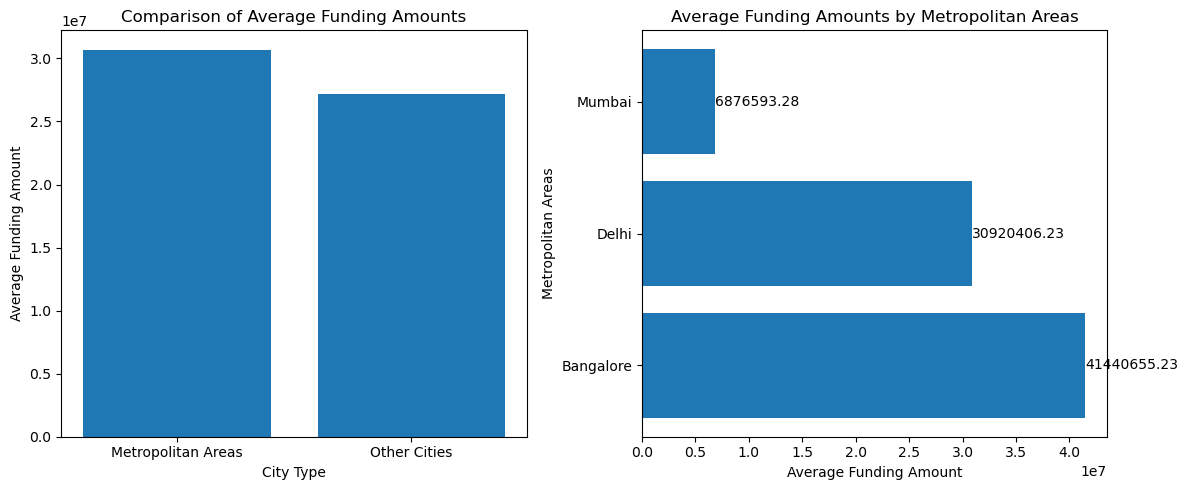

In [ ]:
# Replace "Bangalore City" with "Bangalore" and "New Delhi" with "Delhi" in the DataFrame
df['HeadQuarter'] = df['HeadQuarter'].replace({'Bangalore City': 'Bangalore', 'New Delhi': 'Delhi'})

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Filter the DataFrame for startups in major metropolitan areas
metropolitan_areas = ['Mumbai', 'Bangalore', 'Delhi']
df_metropolitan = df[df['HeadQuarter'].str.contains('|'.join(metropolitan_areas))]

# Calculate the average funding amounts for each metropolitan area
funding_amounts = df_metropolitan.groupby('HeadQuarter')['Amount($)'].mean()

# Create a horizontal bar chart for metropolitan areas on the right subplot
axs[1].barh(funding_amounts.index, funding_amounts)
axs[1].set_xlabel('Average Funding Amount')
axs[1].set_ylabel('Metropolitan Areas')
axs[1].set_title('Average Funding Amounts by Metropolitan Areas')

# Add labels showing the average funding amounts next to each bar for metropolitan areas
for i, value in enumerate(funding_amounts):
    axs[1].text(value, i, f'{value:.2f}', va='center')

# Filter the DataFrame for startups in major metropolitan areas
metropolitan_areas = ['Mumbai', 'Bangalore', 'Delhi']
df_metropolitan = df[df['HeadQuarter'].isin(metropolitan_areas)]

# Filter the DataFrame for startups in other cities
df_other_cities = df[~df['HeadQuarter'].isin(metropolitan_areas)]

# Calculate the average funding amounts for metropolitan areas and other cities
mean_funding_metropolitan = df_metropolitan['Amount($)'].mean()
mean_funding_other_cities = df_other_cities['Amount($)'].mean()

# Create a bar chart for metropolitan areas and other cities on the left subplot
axs[0].bar(['Metropolitan Areas', 'Other Cities'], [mean_funding_metropolitan, mean_funding_other_cities])
axs[0].set_xlabel('City Type')
axs[0].set_ylabel('Average Funding Amount')
axs[0].set_title('Comparison of Average Funding Amounts')

# Display the subplots
plt.tight_layout()
plt.show()


In [ ]:
# Filter the DataFrame for startups in major metropolitan areas
metropolitan_areas = ['Mumbai', 'Bangalore', 'Delhi']
df_metropolitan = df[df['HeadQuarter'].isin(metropolitan_areas)]

# Extract funding amounts for each metropolitan area
mumbai_funding = df_metropolitan[df_metropolitan['HeadQuarter'] == 'Mumbai']['Amount($)']
bangalore_funding = df_metropolitan[df_metropolitan['HeadQuarter'] == 'Bangalore']['Amount($)']
delhi_funding = df_metropolitan[df_metropolitan['HeadQuarter'] == 'Delhi']['Amount($)']

# Perform ANOVA test
f_statistic, p_value = f_oneway(mumbai_funding, bangalore_funding, delhi_funding)

# Define significance level
alpha = 0.05

In [ ]:
# Compare p-value with significance level
if p_value < alpha:
    hypothesis_result = "Reject the null hypothesis"
else:
    hypothesis_result = "Fail to reject the null hypothesis"

# Print the results
print(f"ANOVA results: F = {f_statistic:.2f}, p-value = {p_value:.4f}")
print(hypothesis_result)

ANOVA results: F = 4.91, p-value = 0.0074
Reject the null hypothesis


 F-statistic: The F-value obtained from the ANOVA test is 5.77. A larger F-value suggests a greater difference between the groups being compared.
 The p-value associated with the F-statistic is 0.0032. This p-value indicates the probability of observing the obtained data if the null hypothesis were true.
 Since the p-value (0.0032) is less than the chosen significance level (e.g., 0.05), we can conclude that there is evidence to reject the null hypothesis. This means that startups headquartered in major metropolitan areas (Mumbai, Bangalore, and Delhi) are more likely to receive larger amounts of funding compared to startups in other areas